# MEC4131Z - Power System Flexible Operation
## Dr Graeme Chown and Mr Priyesh Gosai <br>
### **Department of Mechanical Engineering** <br>
### **University of Cape Town**


This notebook was designed for use in Google Colab. If you are using it in Jupyter please ensure that plotly, matplotlib, numpy ans all the packages listed in the PyPSA intro are installed via the terminal. 

# Introduction to energy systems

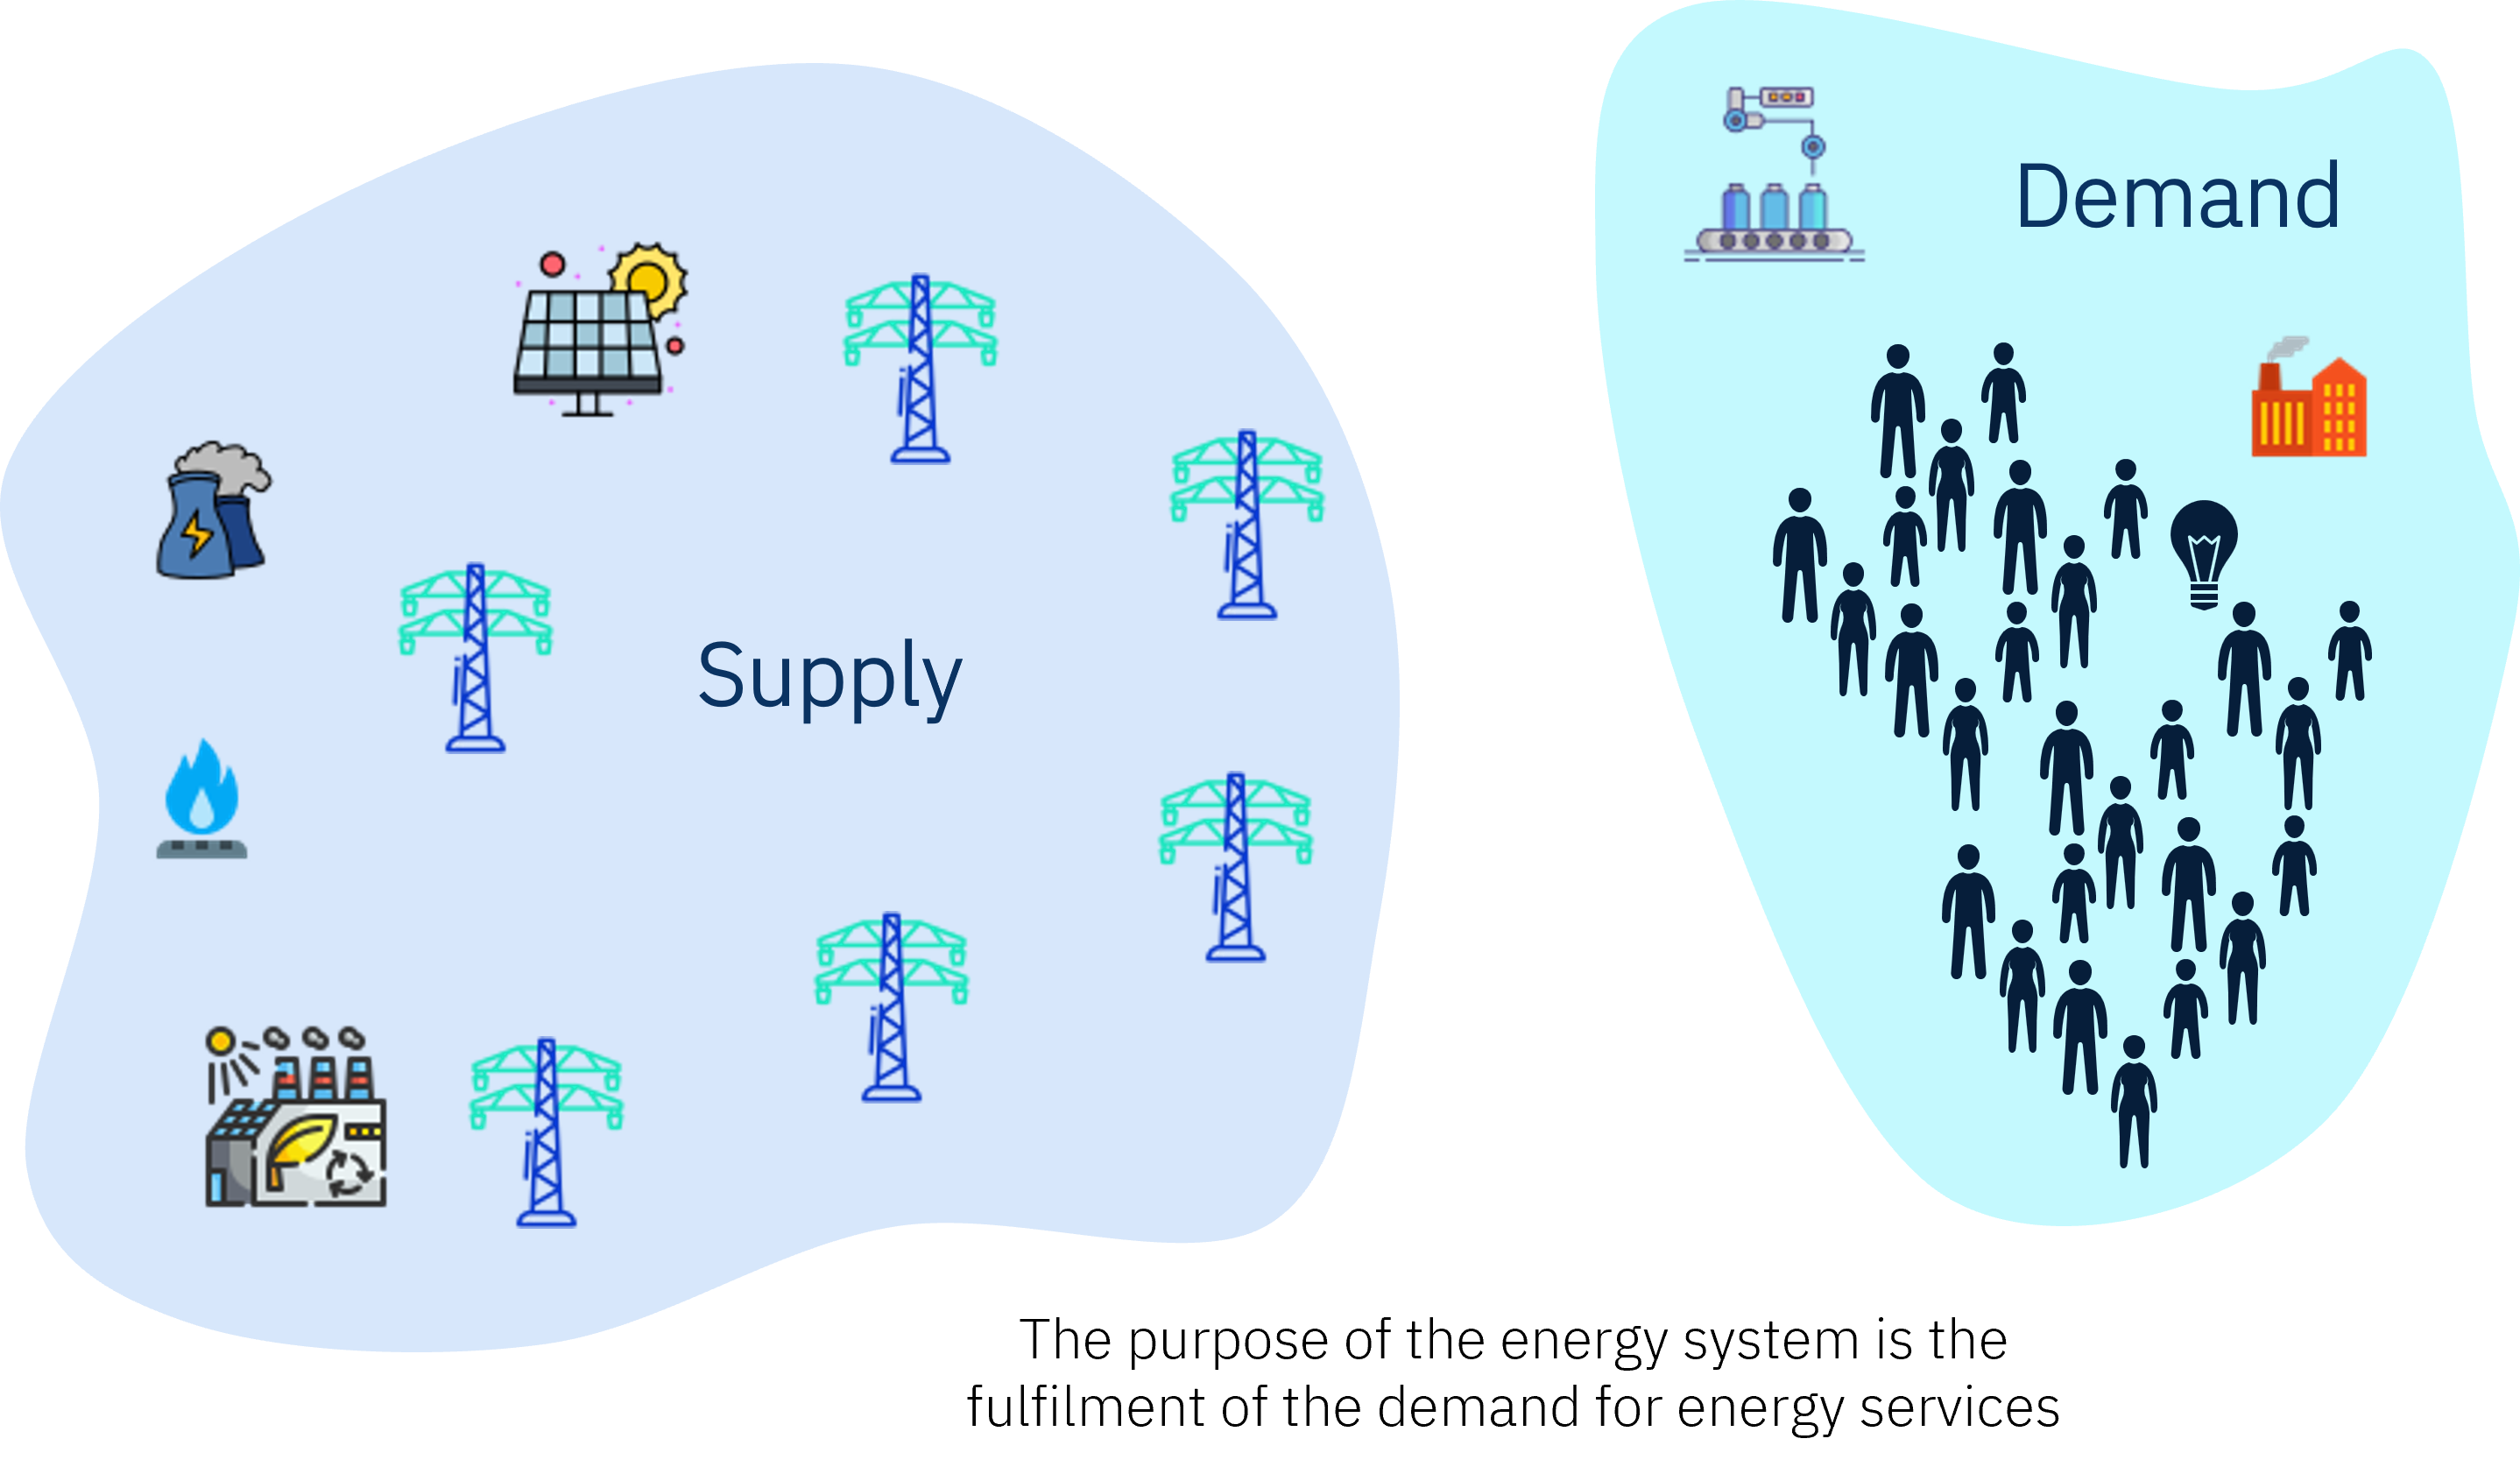

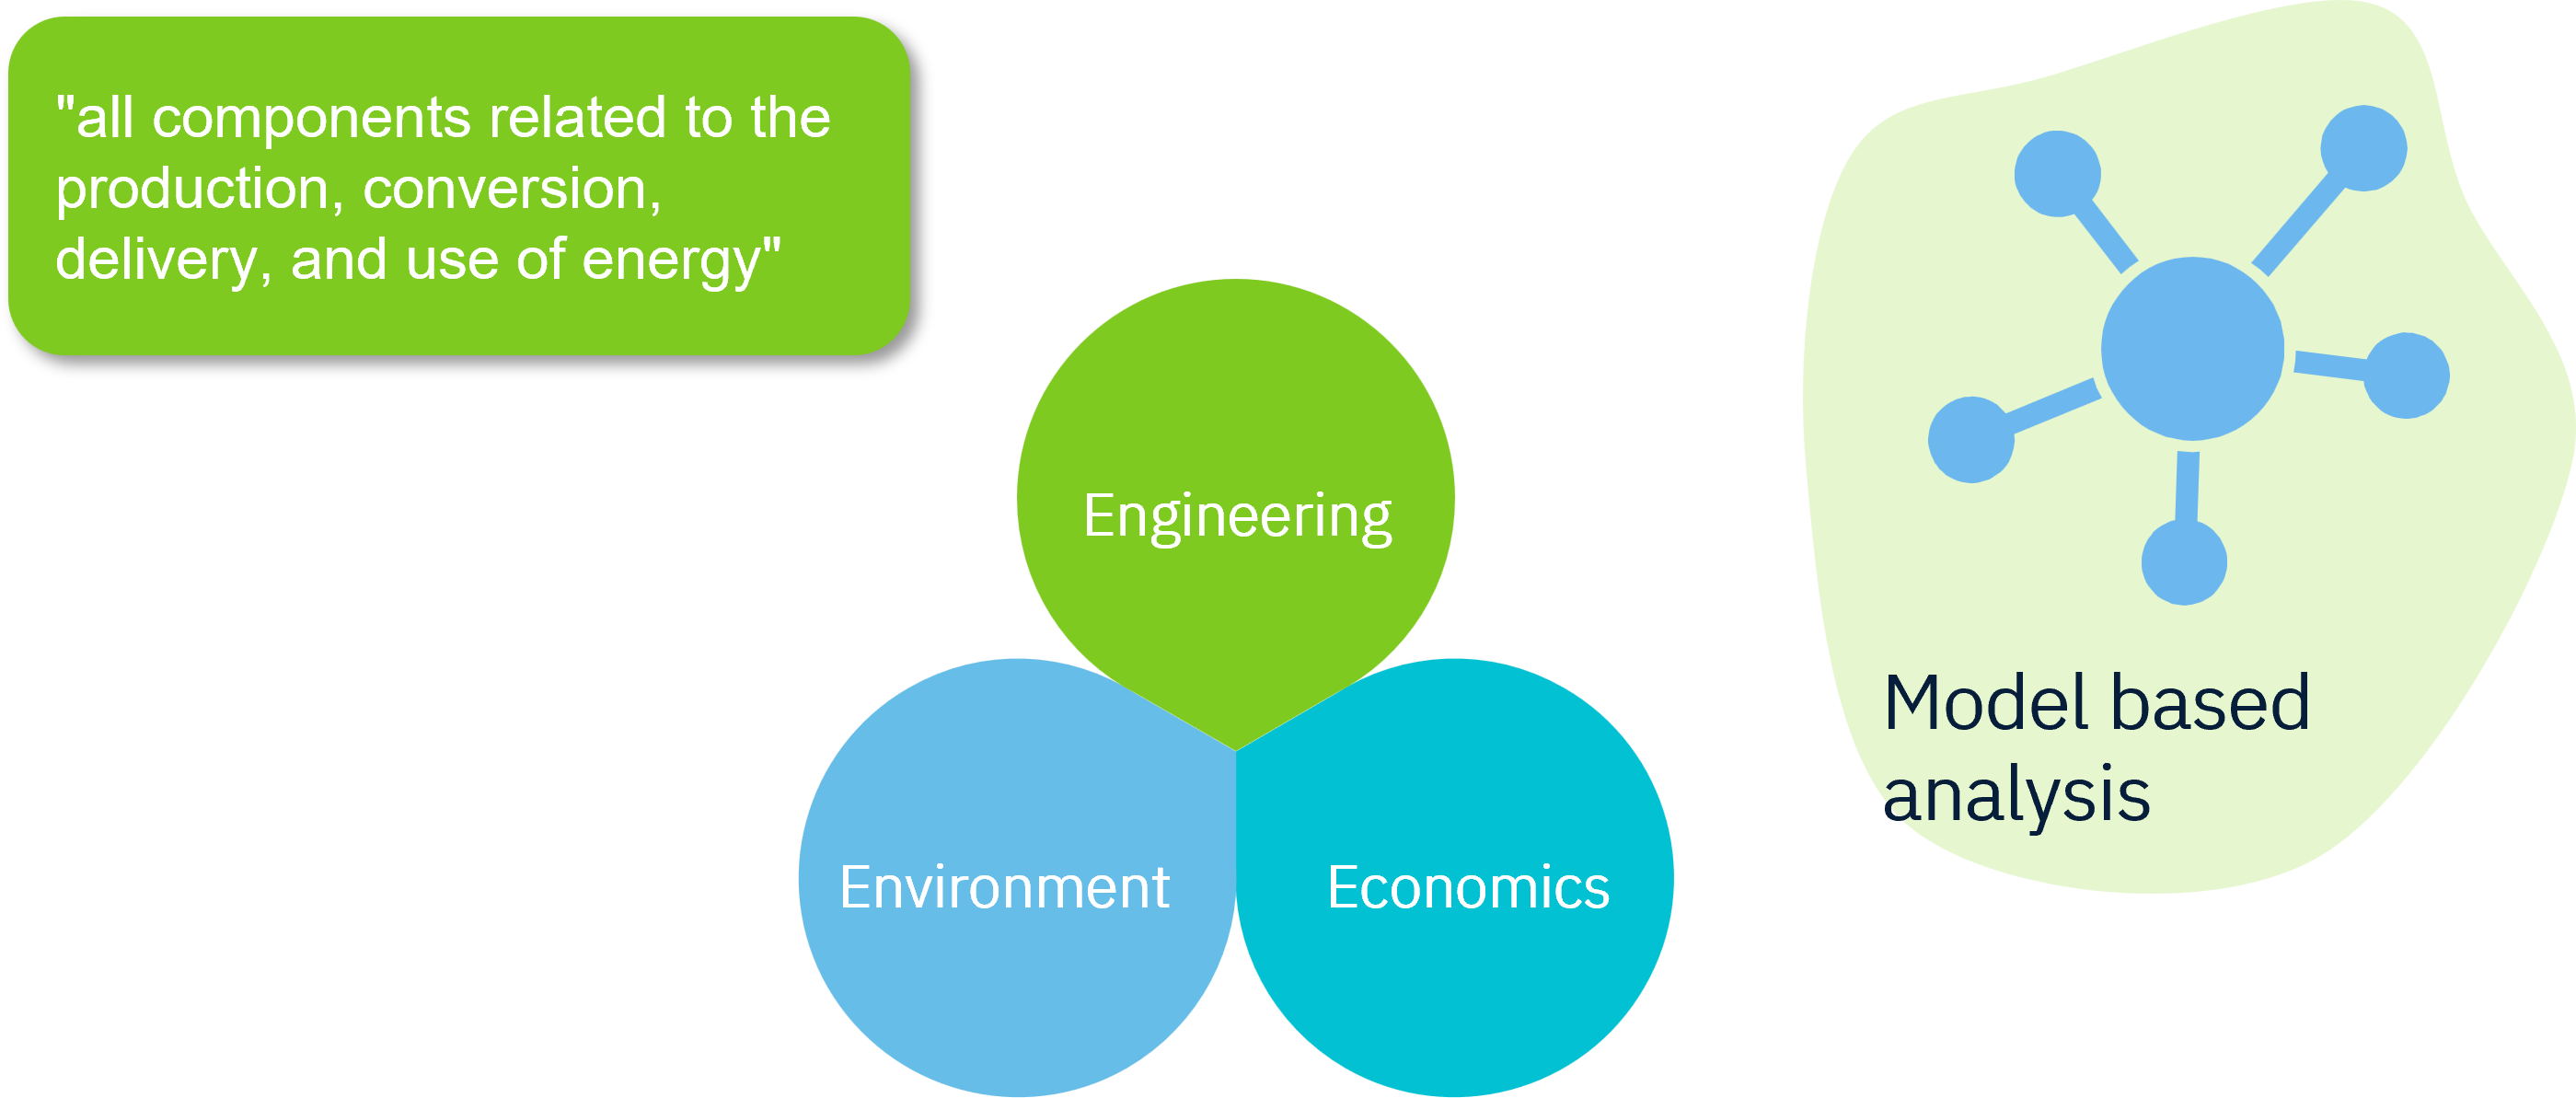

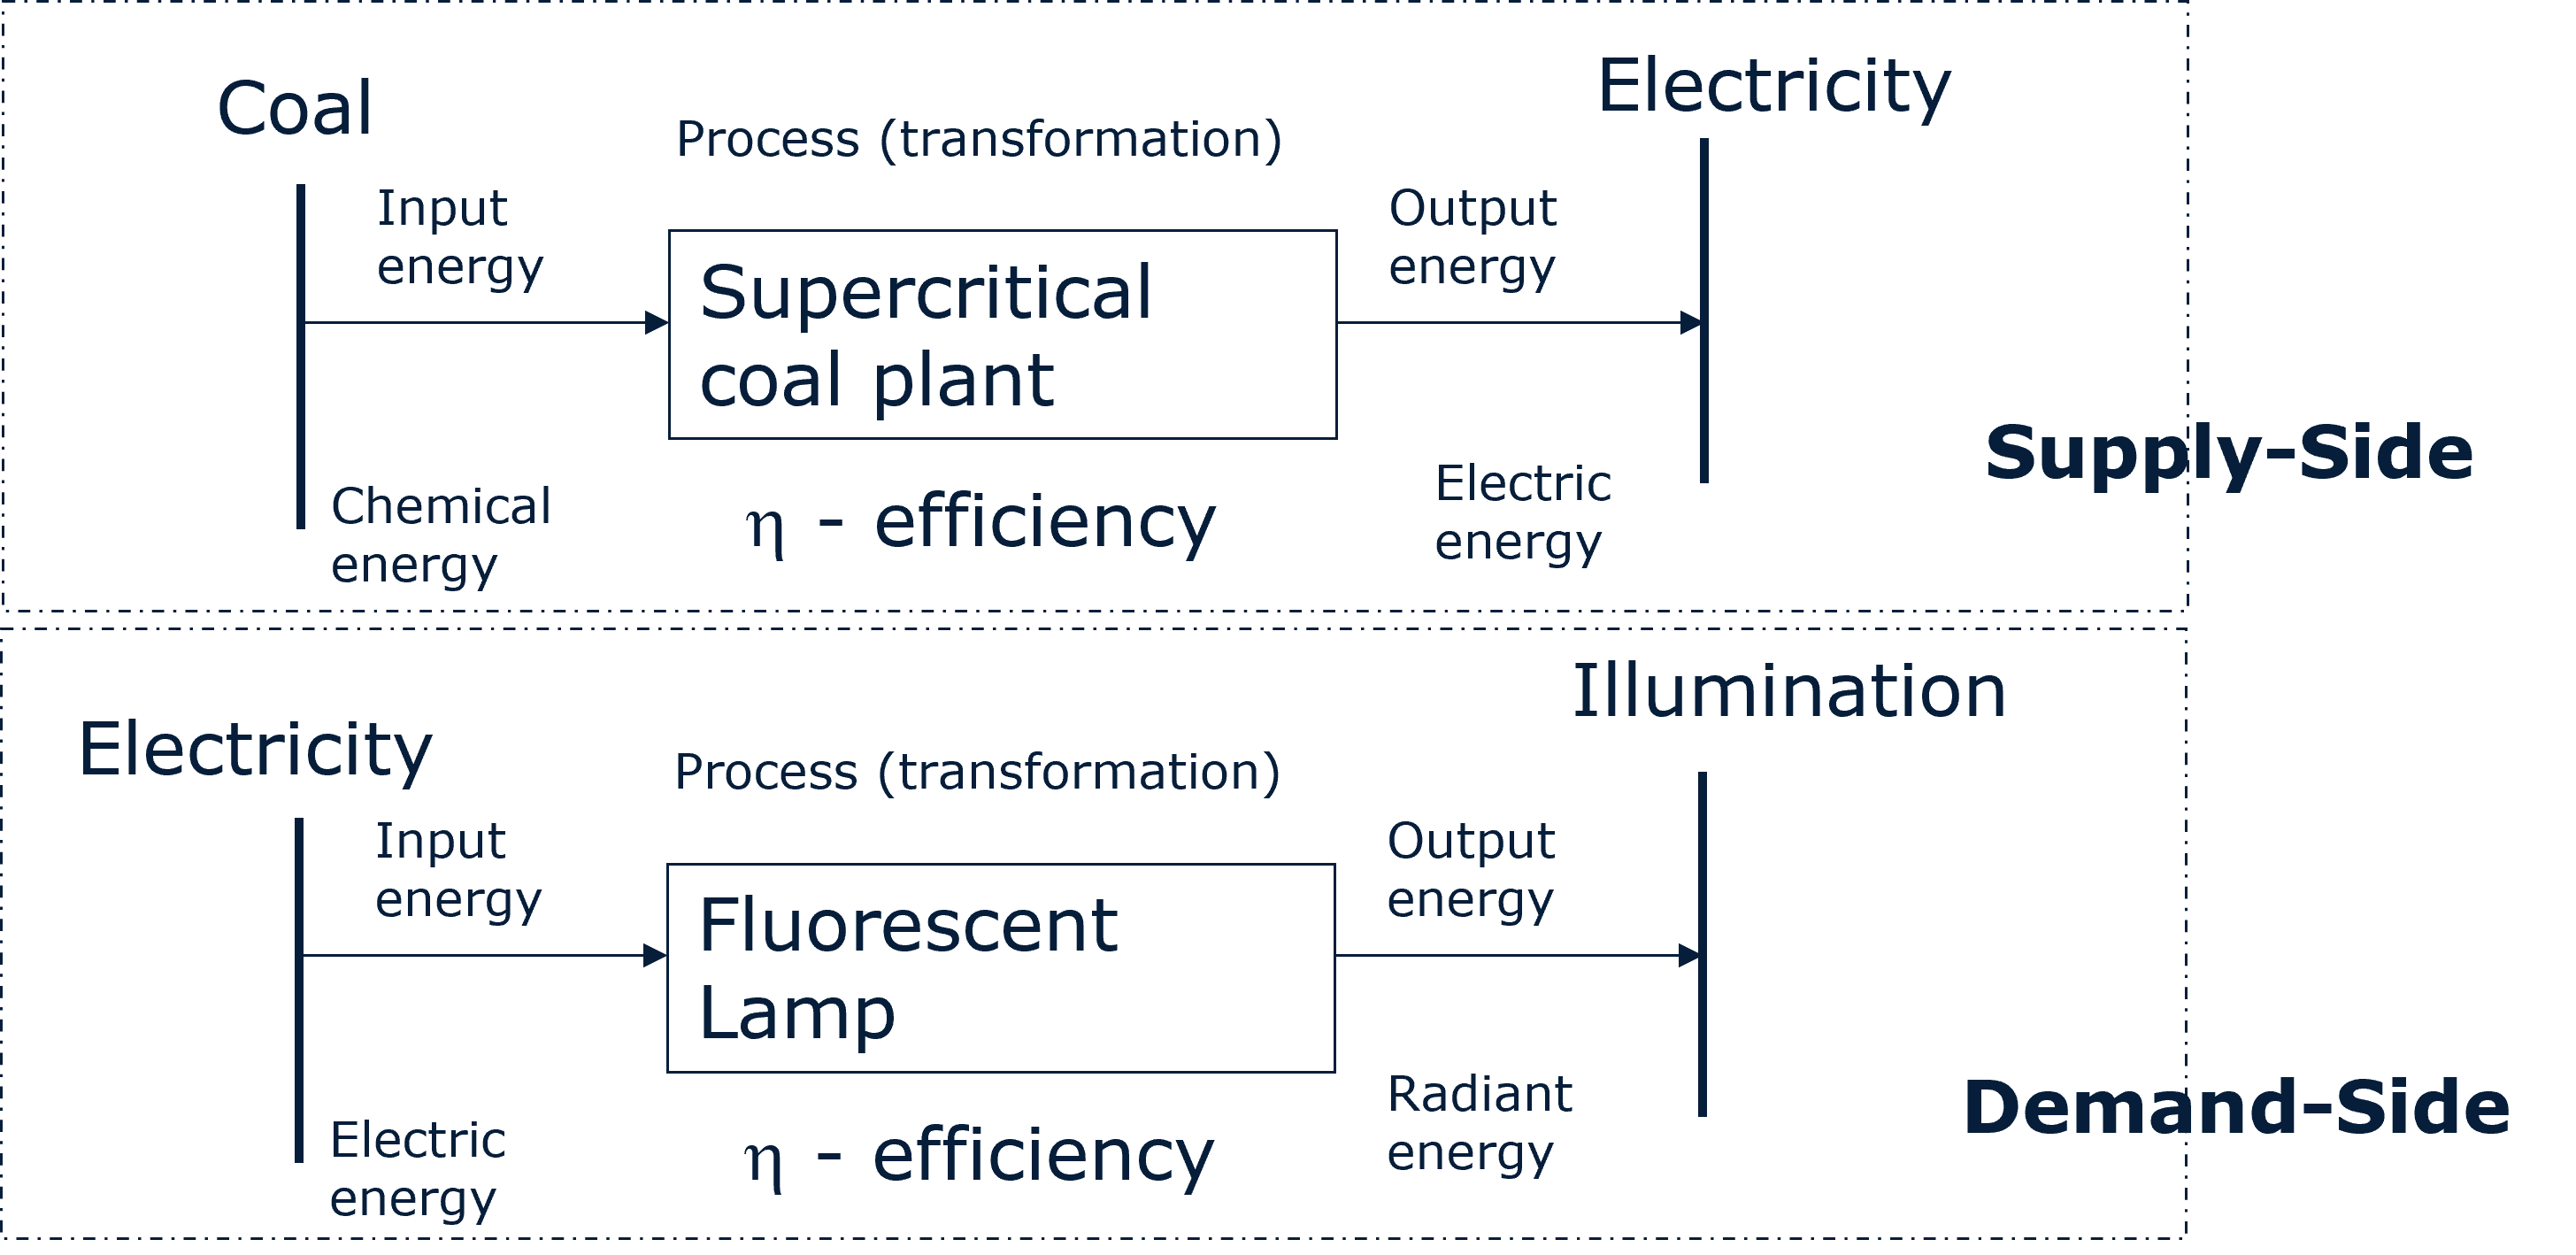

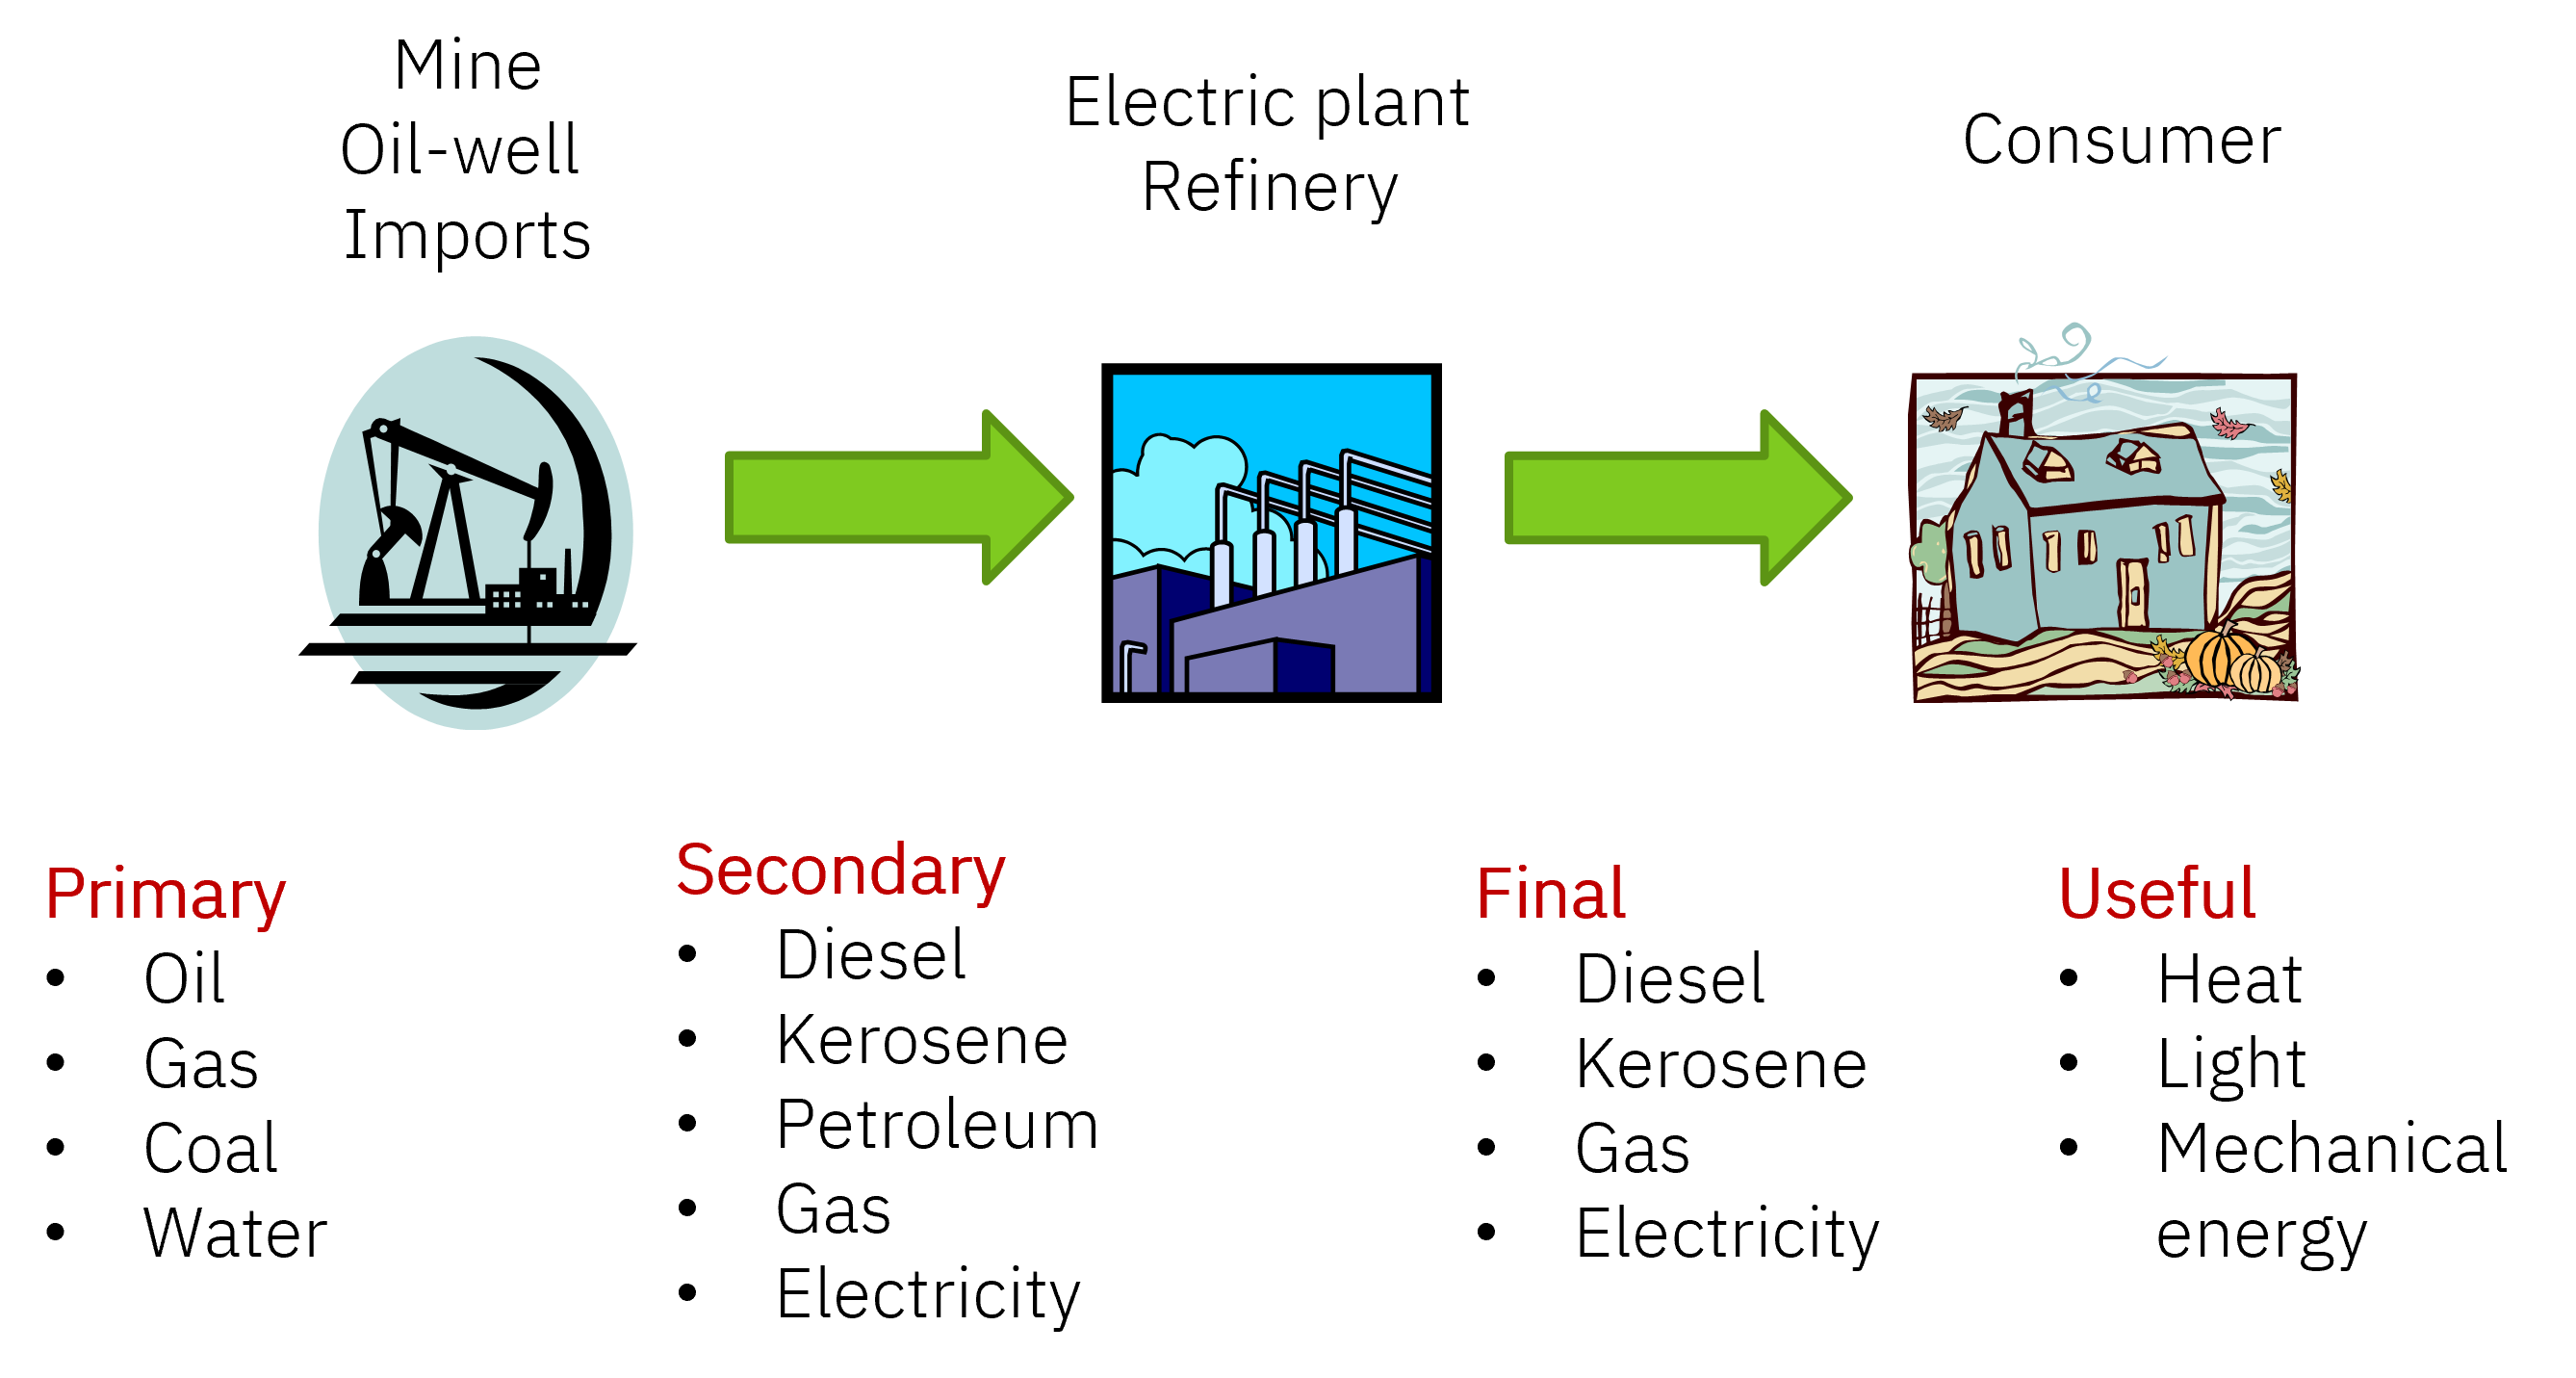

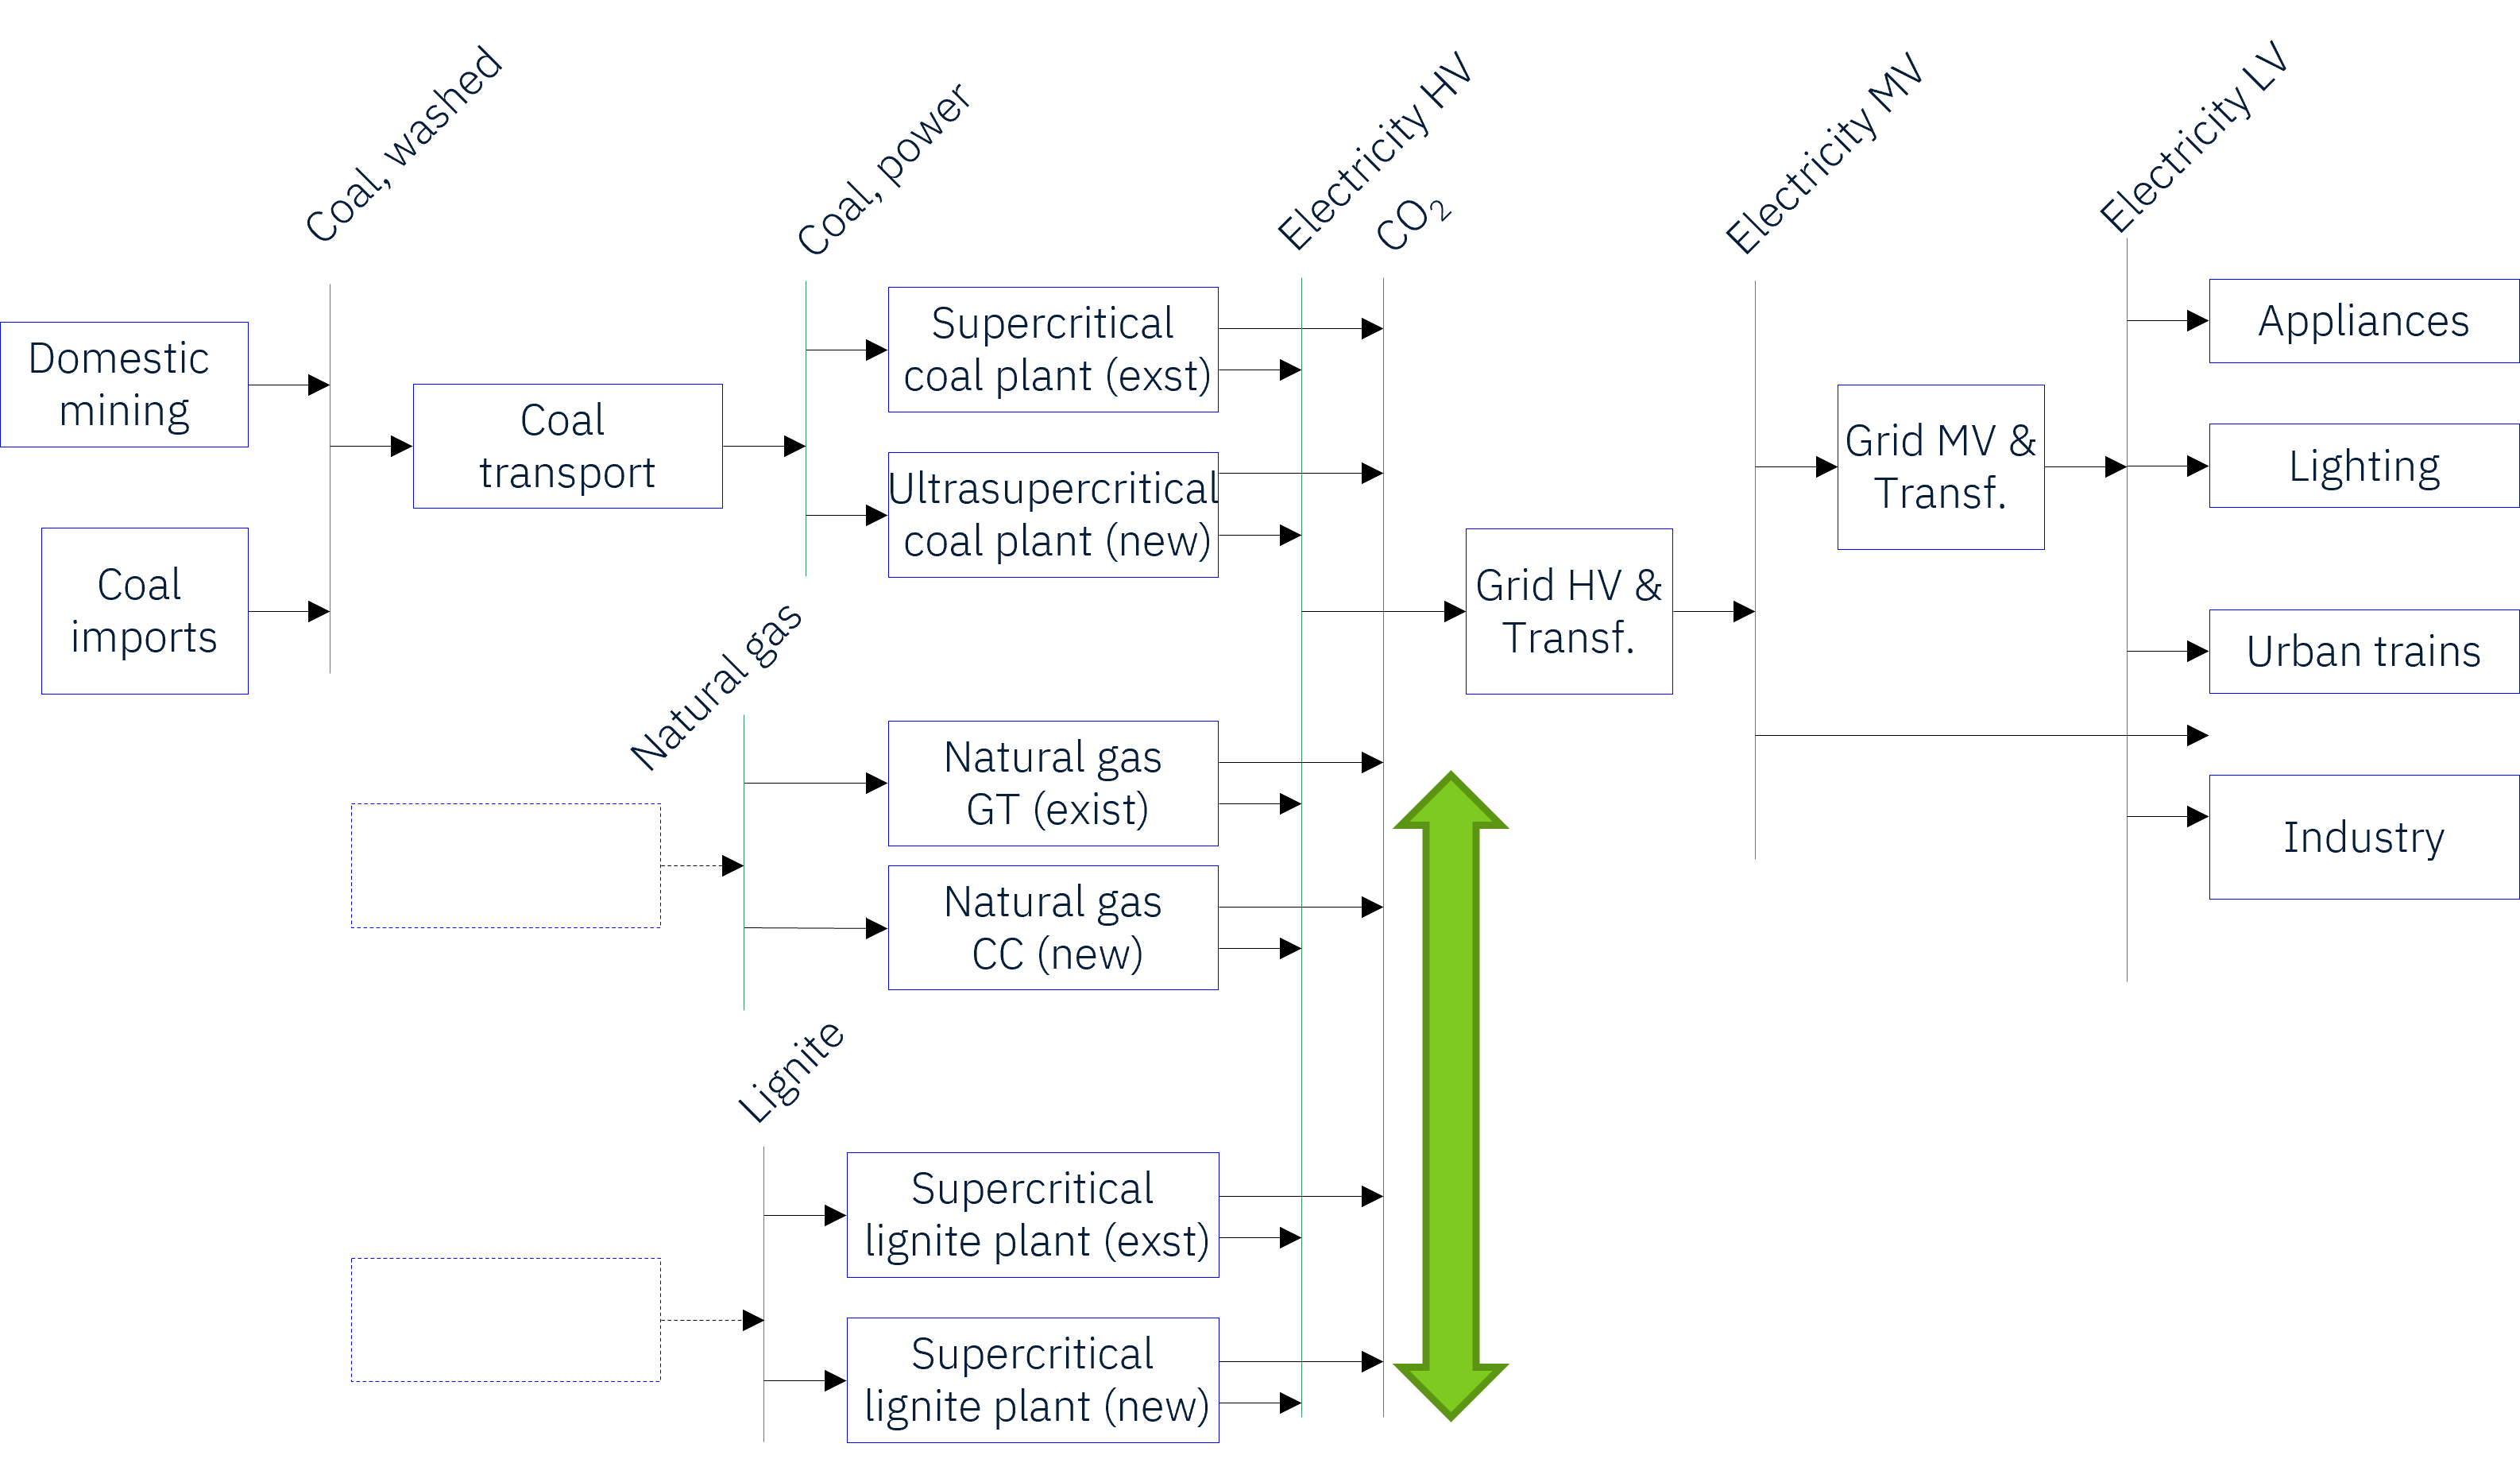

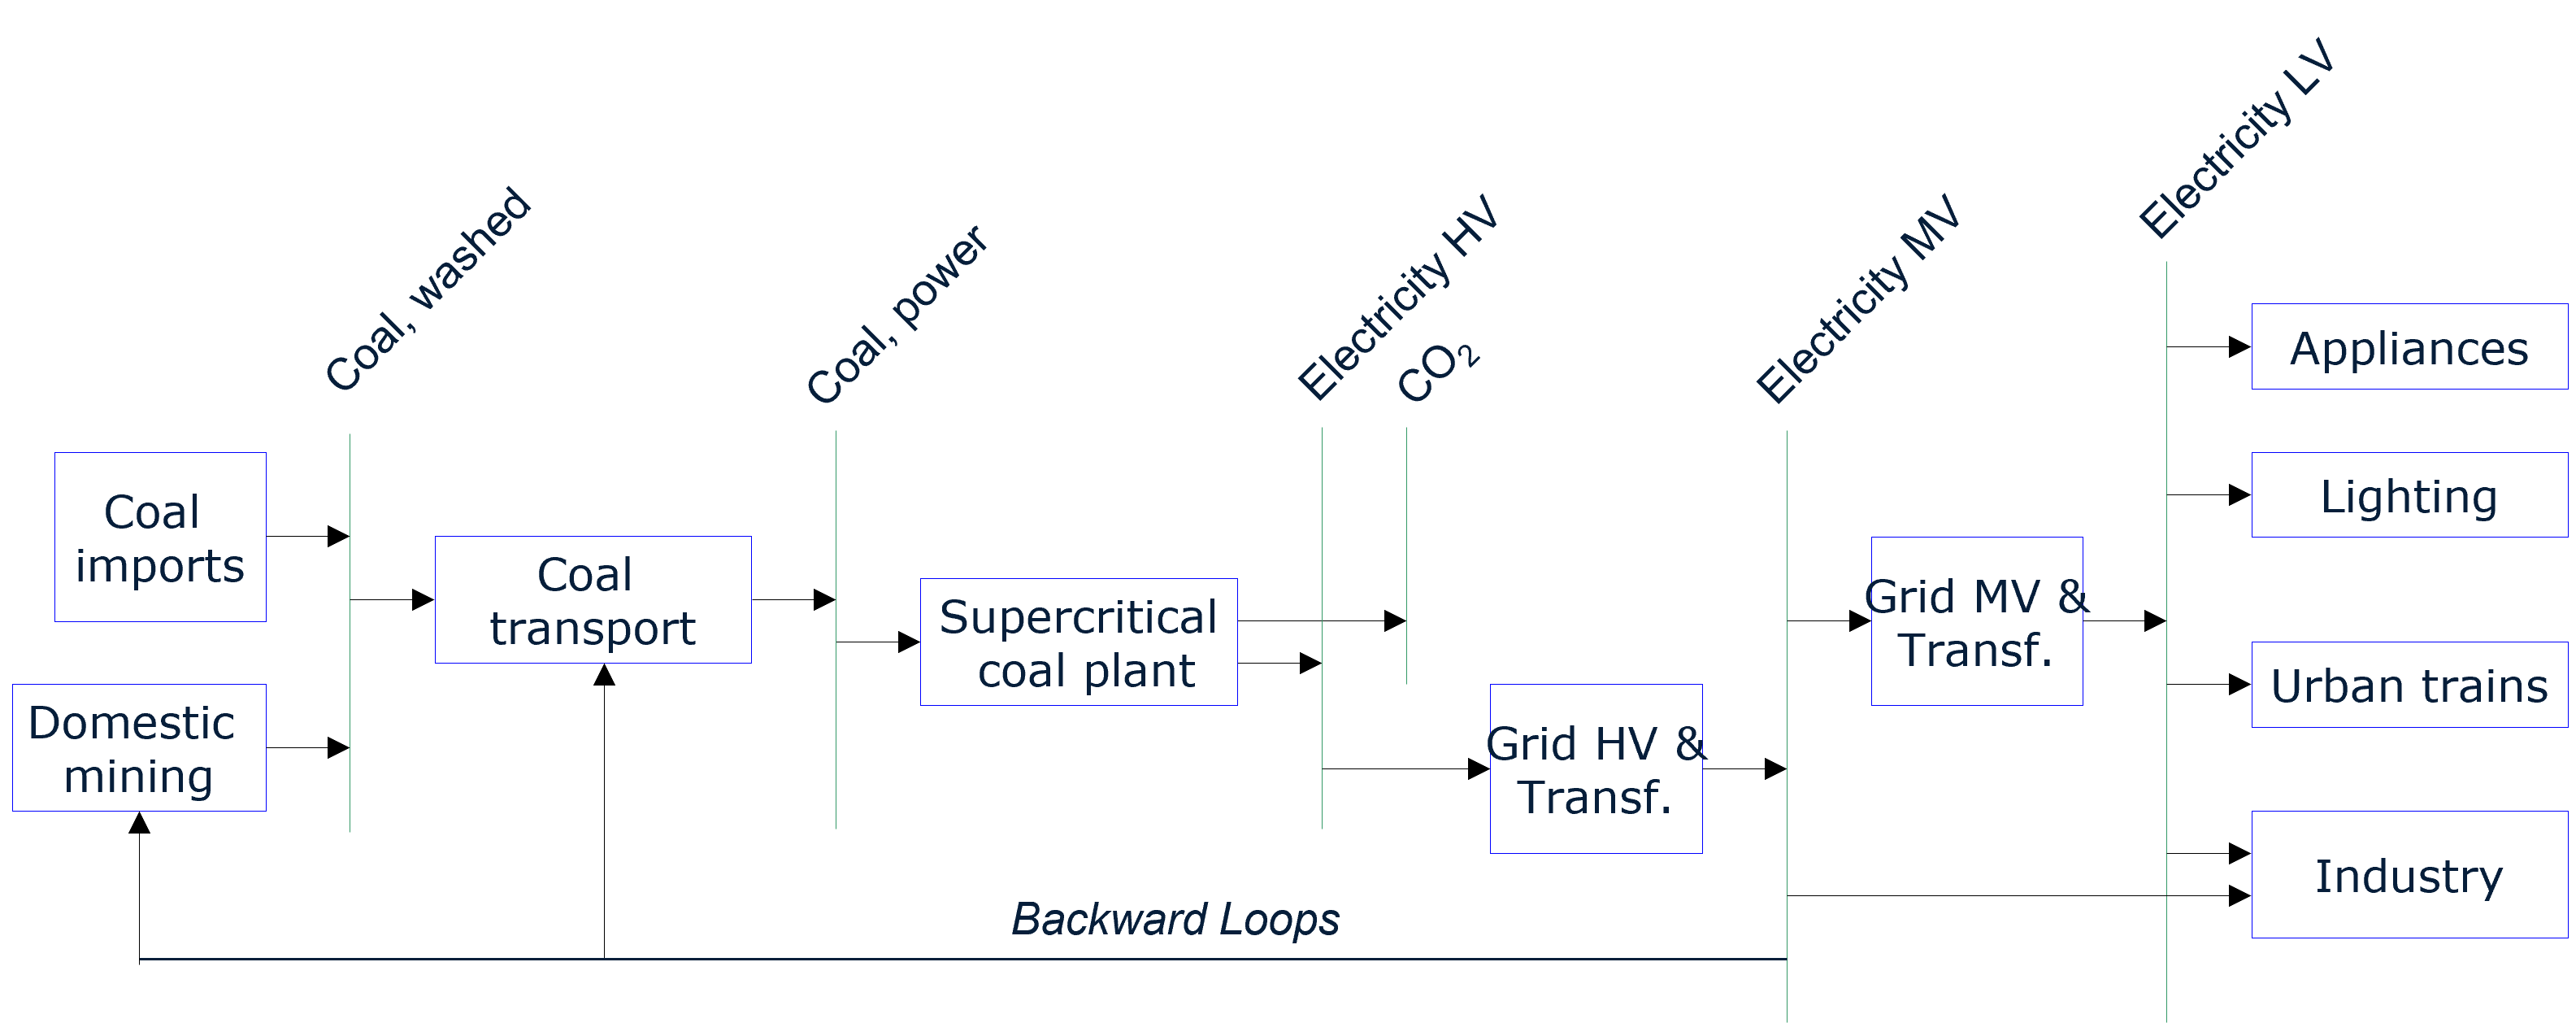

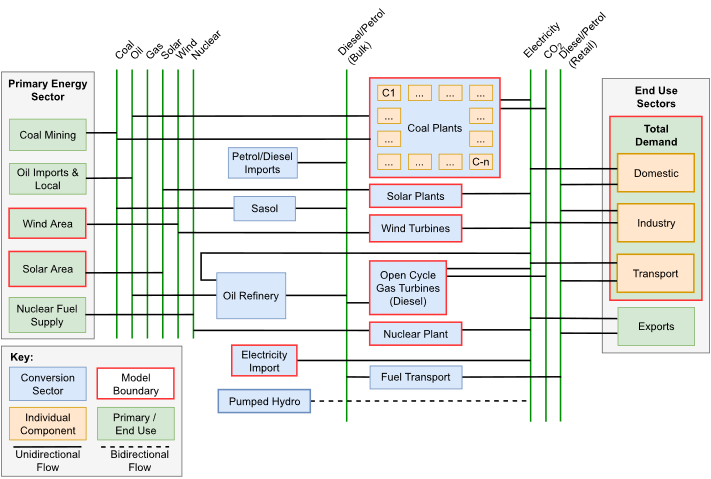

## Demand prediction

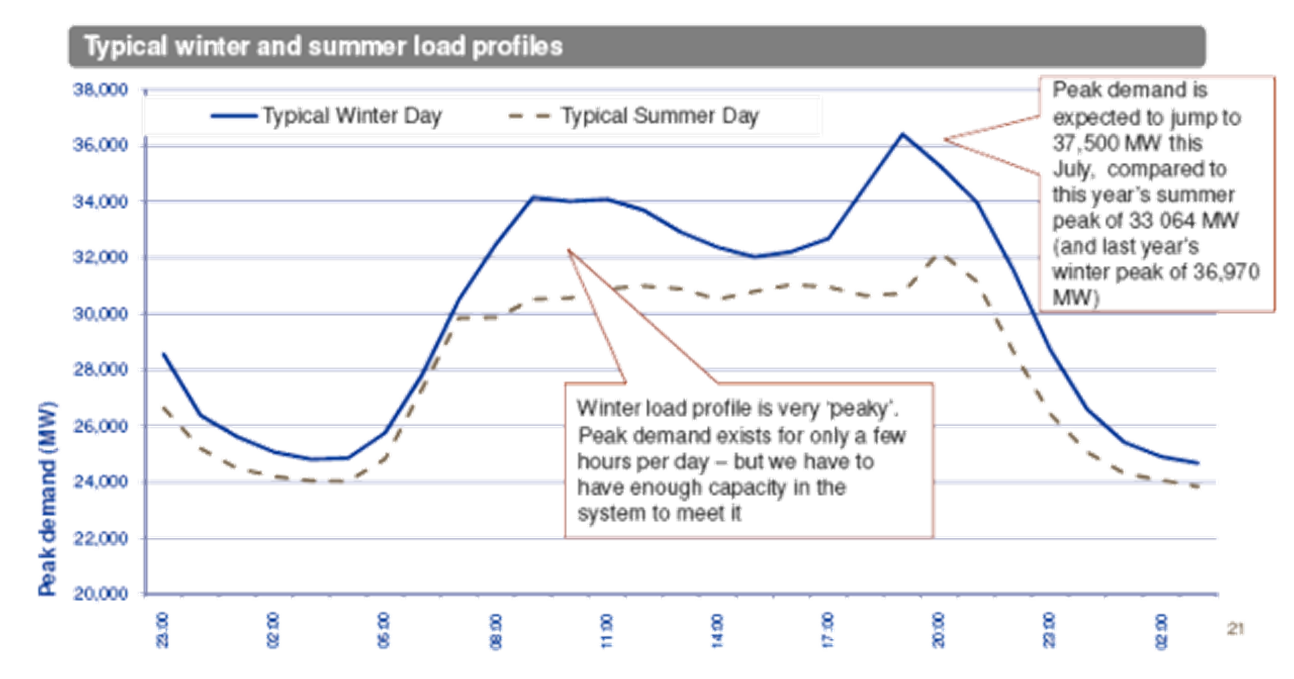

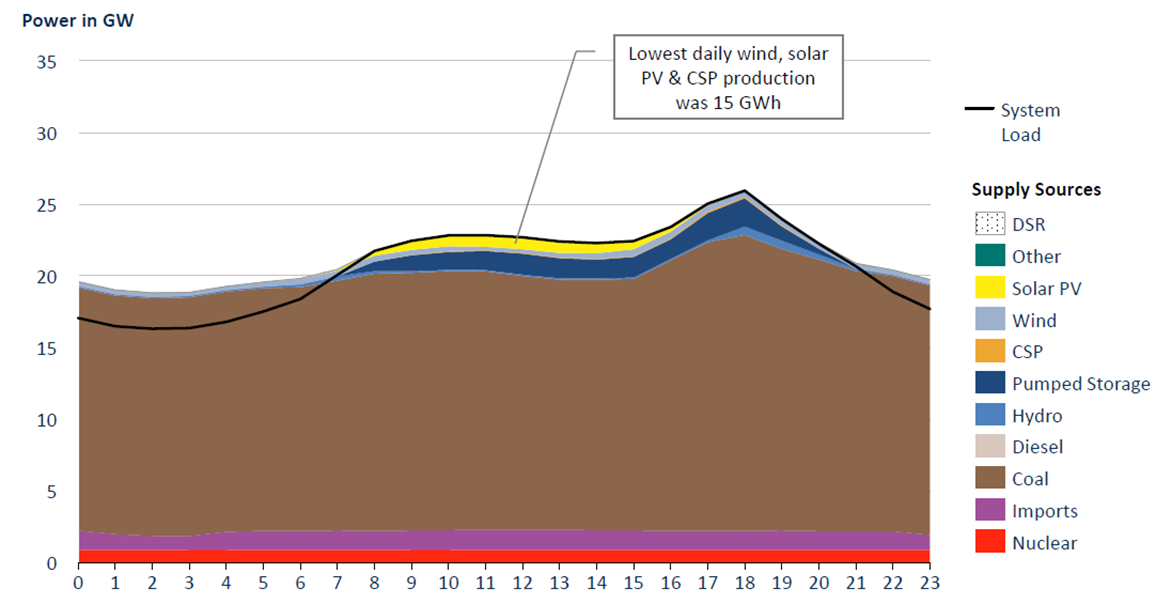

## Supply Costs

In [ ]:
df_bar = pd.read_excel('LCOE_Data.xlsx',index_col = 0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Create a stacked bar chart
df_bar.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Cost Components by Power Generation Technology')
plt.xlabel('Power Generation Technology')
plt.ylabel('Cost')

# Display the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Create the stacked bar chart using Plotly
fig_bar = px.bar(df_bar, x=df_bar.index, y=df_bar.columns, title='Cost Components by Power Generation Technology',
                 barmode='stack')
fig_bar.update_xaxes(title='Power Generation Technology')
fig_bar.update_yaxes(title='Cost [$/MWh]')

# Display the plot
fig_bar.show()

### Long-run marginal cost

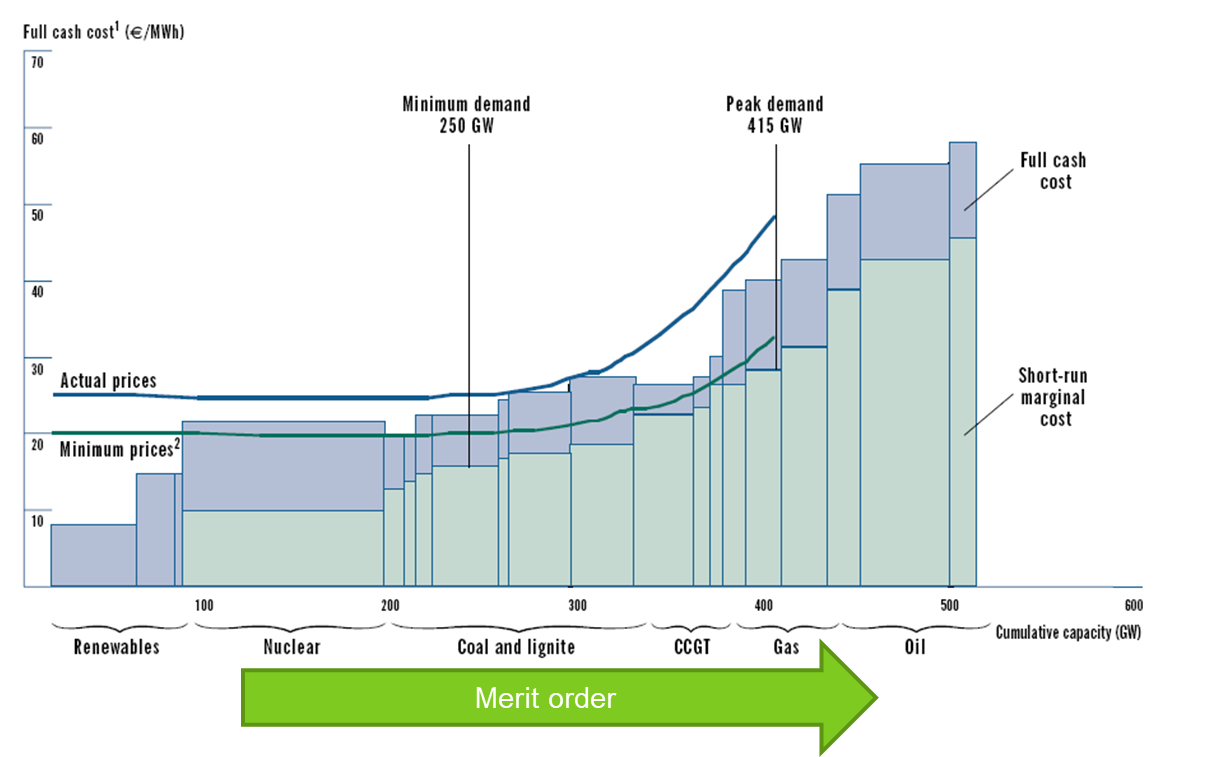

### Short-run marginal cost

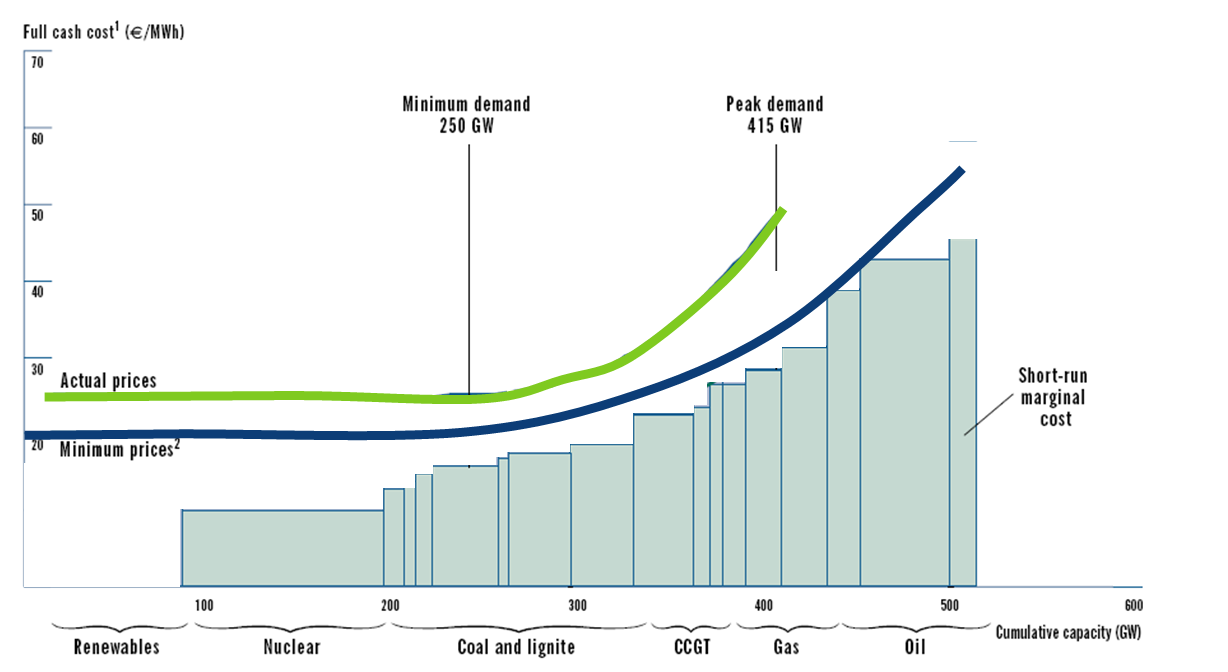

### System operation

In [ ]:
import pandas as pd
df_annual = pd.read_excel('EskomData.xlsx',sheet_name= 'FullYear-2022',index_col = 0)

In [ ]:
def mplStacked(df):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    df.plot(kind='area', stacked=True, alpha=0.7,figsize=(20,10))

    # Set the title and axis labels
    plt.title('Daily Power Output by Plant')
    plt.xlabel('Date')
    plt.ylabel('Power Output (MW)')
    plt.legend(loc='lower left')

    # Display the plot
    plt.show()

In [ ]:
mplStacked(df_annual)

In [ ]:
df_annual.columns

In [ ]:
columns = ['International Imports', 'Thermal Generation',
       'Nuclear Generation', 'Eskom Gas Generation', 'Eskom OCGT Generation',
       'Hydro Water Generation', 'Pumped Water Generation',
       'Dispatchable IPP OCGT',
       'Pumped Water SCO Pumping', 'Wind', 'PV', 'CSP', 'Other RE',
       'Total RE']

mplStacked(df_annual[columns])

In [ ]:
start_date = '2022-11-15'
end_date = '2022-11-19'
after_start_date = df_annual.index >= start_date
before_end_date = df_annual.index <= end_date
between_two_dates = after_start_date & before_end_date

mplStacked(df_annual[columns].loc[between_two_dates])

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

def pxStacked(df_line):
    # Create the stacked line plot using Plotly
    fig_line = px.area(df_line, x=df_line.index, y=df_line.columns, title='Daily Power Output by Plant', width=1400, height=600)
    fig_line.update_xaxes(title='Date')
    fig_line.update_yaxes(title='Power Output (MW)')

    # Display the plot
    fig_line.show()

In [ ]:
pxStacked(df_annual[columns])

### Electricity product offering

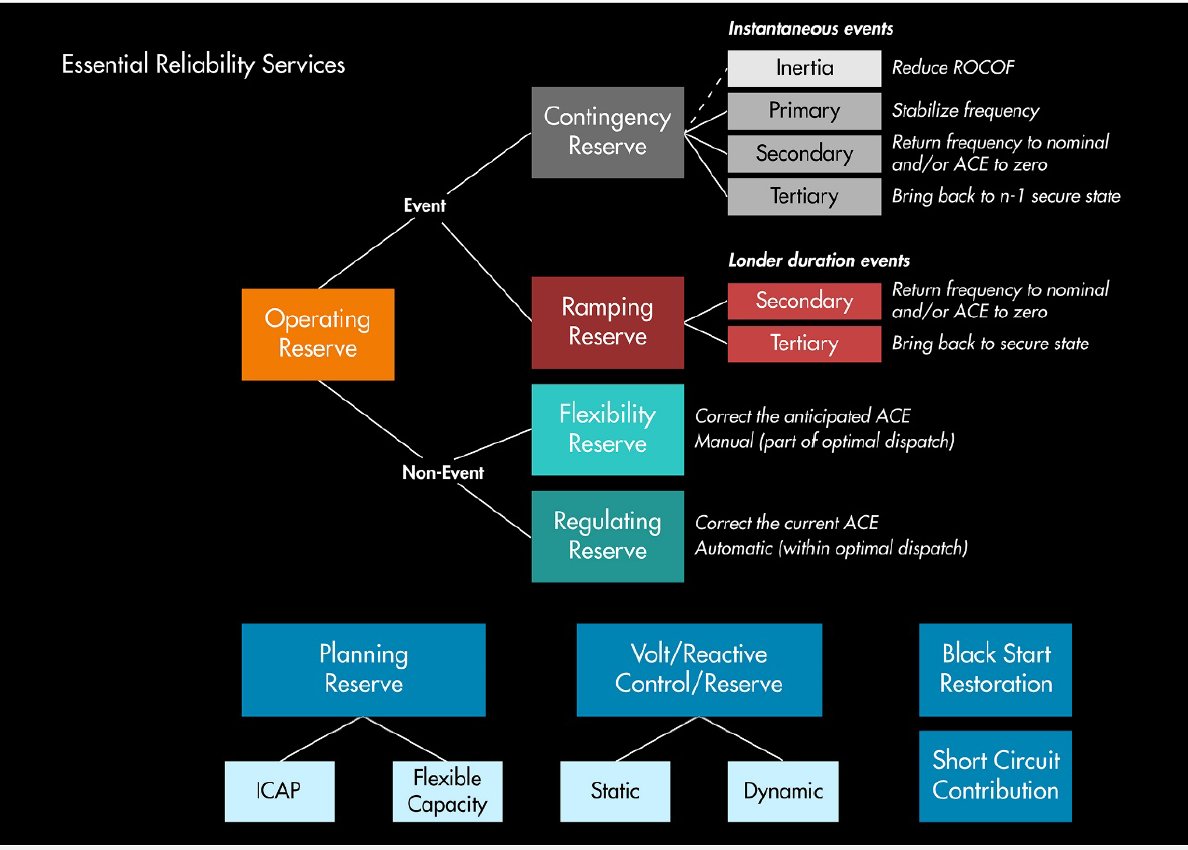

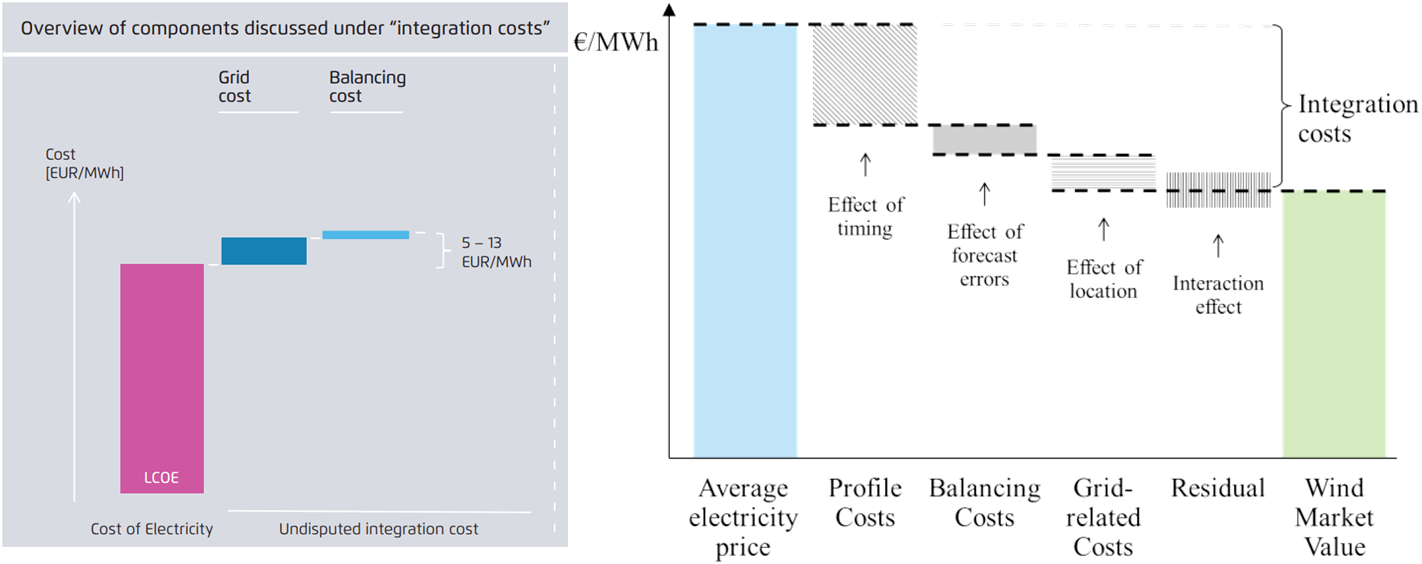

How do you determine which plants need to run to provide the necessary services? 

# Optimisation using Python

## Example 1: Economic dispatch model optimisation

A power system consists of generators, transmission (and distribution) lines  and loads which respectively produce, transmit and consume electricity. Storing electricity on a large scale is not possible, but it can be changed into other energy forms that can be stored and later re-transformed into electricity as needed. Battery systems, flywheels, compressed air, and pumped hydro storage are all methods of storing electricity. Therefore, the net energy generated is equal to the system load and power losses. 

Economic dispatch models (EDM) are used to determine the generation cost for a given load. Optimisation of EDM produces gives the generator loads which minimise the cost of generation. 

In this workbook, the simple three bus system, made up of three generators and two loads shown in Figure 1 is analysed. 

The short run marginal operating cost of each generator is $C_{g,i}$ is given as a quadratic function dependent on the power produced $P_{g,i}$.

$$C_{g,i} = a_i P_{g,i}^2+b_i P_{g,i} + d_i$$

where, coefficients $a$, $b$ and, $d$ are generator specific charateristics.

The total cost of generation for $n$ generators is given as: 

$$C_{total} = \sum_{i=1}^{n}{C_{g,i}}$$

The total demand is given as:

$$P_D = P_{L,1}+P_{L,2}$$

For the optimisation, we consider the following constraints: 

*   The total power generated must equal the demand (equality constraints). 

$$P_D = \sum_{i=1}^{n}{P_{g,i}}$$

*   The generators operate within their output constraints (inequality constraints). 
$$P_{g,i,min}\leq P_{g,i}\leq P_{g,i,max}$$







**Figure 1: Three bus system**


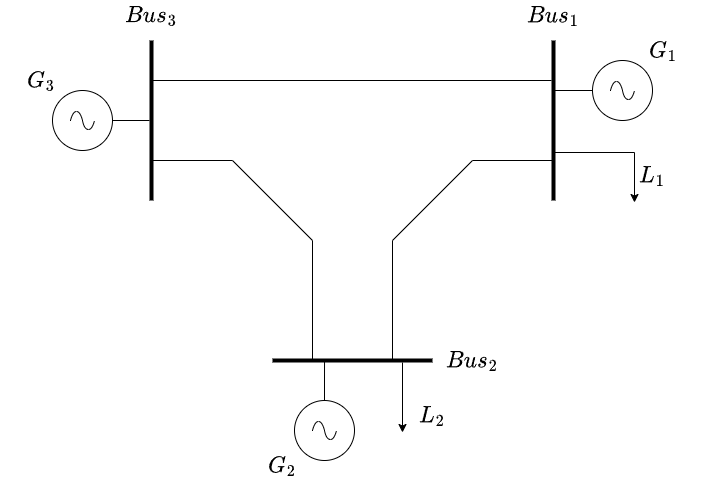

**Table 1: Cost function coefficients**
\begin{array}{|c|c|} \hline
Generator_i & a_i & b_i & d_i & P_{min,i} & P_{max,i} \\ 
& & & & [MW] & [MW]\\\hline
G_1 & 0.002 & 4.4 & 200 & 180 & 650 \\
G_2 & 0.0067 & 1.5 & 500 & 800 & 380\\
G_3 & 0.0015 & 6.8 & 54 & 50 & 220\\ \hline
\end{array}

## Analysis

In [ ]:
# Import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Plot the cost functions for the three generators in their operating range. 

*   Create a coefficient matrix using the values in Table 1.
*   Create a method called `cost` which calculates the cost of a generator ($G_i$)for a given load.
*   Create a numpy array that stores a series of values between the generator limits given in Table 2. 
*   Numpy arrays allow for array operations. Therefore by calling the method with a list as an input produces a list of costs in the variable `Plant1`..`Plant3`. These variables are then transposed and converted into DataFrames.
*   Plot the functions on the same axes. 

*Activity:*

*Adjust the generator limits so see how the plant would operate if it produced more or less power.* 

*Change the number of points in each array, figure size, line style, line colors, markers, legend name, graph title.*











In [ ]:
# *****************************************************
# Dataset 1
Generator_1  = np.array([0.002, 4.4, 200,180,650])
Generator_2  = np.array([0.0067, 1.5, 500,80,380])
Generator_3  = np.array([0.0015, 6.8, 54,50,220])

Load1 = 600
Load2 = 320
Gen = [Generator_1,Generator_2,Generator_3]
P_D = Load1 + Load2
# *****************************************************


In [ ]:
def cost(Power, i, Generators=[]):
  return np.array([Power,Generators[i][0]*Power**2 + Generators[i][1]*Power + Generators[i][2]])


In [ ]:
P1_minmax = [Generator_1[3] ,Generator_1[4]]
P2_minmax = [Generator_2[3] ,Generator_2[4]]
P3_minmax = [Generator_3[3] ,Generator_3[4]]

P1 = np.linspace(P1_minmax[0], P1_minmax[1], 50)
P2 = np.linspace(P2_minmax[0], P2_minmax[1], 50)
P3 = np.linspace(P3_minmax[0], P3_minmax[1], 50)

Plant1=cost(P1,0,Gen)
Plant2=cost(P2,1,Gen)
Plant3=cost(P3,2,Gen)

C1 = pd.DataFrame(np.transpose(Plant1),columns = ['Power','Cost'])
C2 = pd.DataFrame(np.transpose(Plant2),columns = ['Power','Cost'])
C3 = pd.DataFrame(np.transpose(Plant3),columns = ['Power','Cost'])

plt.plot(C1.Power, C1.Cost, label = 'Generator 1', color = 'r')
plt.plot(C2.Power, C2.Cost,label = 'Generator 2', color = 'b')
plt.plot(C3.Power, C3.Cost,label = 'Generator 3', color = 'g')

plt.xlabel('Power [$MW$]')
plt.ylabel('Cost [$]')
plt.title('Cost vs. Power')
plt.legend()

plt.show()


2. Calculate the system cost. 

*   Create a method that calculates the total system cost given a list of power generated `[Generator1, Generarator2, Generator3]`. The method uses the `cost` function. 




In [ ]:
def systemcost(P,Gen=[]):
  return sum(cost(P[i],i,Gen)[1] for i in range(3))

3. We now want to consider all possible combinations of power output. Therefore we create a method that takes in two lists of the range of power produced by `Generator1` and `Generator2`. The method determines all combinations and excludes those outside the limit for `Generator3`. 

The output from this method is a list containing the following for each combination.

`[Power1,Power2,Power3,Cost}]`

In [ ]:
def create_combinations(input1, input2):
    combinations = []
    for i in input1:
        for j in input2:
          k = P_D - i - j
          if P3_minmax[0] < k < P3_minmax[1]:
              d = systemcost([i,j,k],Gen)
              
              combinations.append([i,j,k,d])
    return combinations

4. We generate two numpy arrays for `Generator1` and `Generator2` with `n_points`. These numpy arrays are used in the `create_combinations` method to produce all the data which is converted to a DataFrame.

In [ ]:
n_points = 20
P1 = np.linspace(P1_minmax[0], P1_minmax[1], n_points)
P2 = np.linspace(P2_minmax[0], P2_minmax[1], n_points)

data = create_combinations(P1, P2)
df = pd.DataFrame(data, columns = ['P1','P2','P3','Cost'])

*Activity:*


*   View the dataframe using either: 

`print(df)` or `display(df)`



*   Filter data by using: 

`newdf = df.loc[(df.P1 > 300) & (df.P1 < 500)]`


*   Export the dataframe to an Excel file using: 

`df.to_excel('filename.xlsx')`

Then, click on the folder icon on the left. Find the file you just created and click through the folder structure.

Note, the files in this folder structure will be deleted when the runtime disconnects. Later on in this course, we will show you how to mount your Google Drive to this worksheet. 

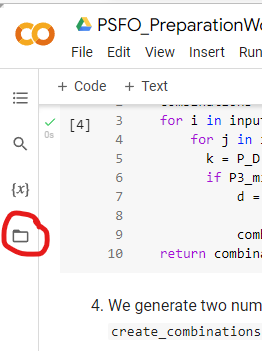

5. We can filter out the minimum cost from this table. 

In [ ]:
min_df= df[df.Cost == df.Cost.min()]
display(min_df)

6. We can plot the data in this table on a 3-D plot. 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df.P1, df.P2, df.Cost, c=df.Cost, cmap='viridis')
plt.colorbar(sc)

plt.show()

7. The plot using `matplotlib` is not very legible. Therefore we can also use the `plotly` toolbox which allows you to create interactive plots. 

*Activity*

*Move the resultant graph to find the red dot which represents the minimum point.*

*Adjust the colors in the plot.*

In [ ]:
import plotly.graph_objs as go

# Get the minimum value in the 'z' column
min_value = df.Cost.min()

# Create a new column 'color' that indicates the color of the marker
df['color'] = np.where(df.Cost == min_value, 'red', 'grey')

fig = go.Figure(data=[go.Scatter3d(
    x=df['P1'],
    y=df['P2'],
    z=df['Cost'],
    mode='markers',
    marker=dict(size=6, color=df['color'], opacity=0.5)
)],layout=dict(width=1200, height=1000))

fig.show()

8. We cal also plot the data on a 2-D plane using different axes. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,15))

# First plot
ax[0,0].scatter(df.P1, df.P2, color=sns.color_palette()[0])
ax[0,0].scatter(df[df.Cost == df.Cost.min()].P1, df[df.Cost == df.Cost.min()].P2, label='Mimimum', color=sns.color_palette()[1])
ax[0,0].set_xlabel('P1')
ax[0,0].set_ylabel('P2')
ax[0,0].legend()

# Second plot
ax[0,1].scatter(df.P3, df.Cost, color=sns.color_palette()[0])
ax[0,1].scatter(df[df.Cost == df.Cost.min()].P3, df[df.Cost == df.Cost.min()].Cost, label='Mimimum', color=sns.color_palette()[1])
ax[0,1].set_xlabel('P3')
ax[0,1].set_ylabel('Cost')
ax[0,1].legend()

# Third plot
ax[1,0].scatter(df.P2, df.P3, color=sns.color_palette()[0])
ax[1,0].scatter(df[df.Cost == df.Cost.min()].P2, df[df.Cost == df.Cost.min()].P3, label='Mimimum', color=sns.color_palette()[1])
ax[1,0].set_xlabel('P2')
ax[1,0].set_ylabel('P3')
ax[1,0].legend()

# Fourth plot
ax[1,1].scatter(df.P1, df.P3, color=sns.color_palette()[0])
ax[1,1].scatter(df[df.Cost == df.Cost.min()].P1, df[df.Cost == df.Cost.min()].P3, label='Mimimum', color=sns.color_palette()[1])
ax[1,1].set_xlabel('P1')
ax[1,1].set_ylabel('P3')
ax[1,1].legend()

plt.show()


9. In practice, we use can use a solver to find the combination of power generated to minimise the cost function. Python has a toolbox called `scipy.optimize`. There is a method called `minimize` which we use for this analysis. 

*   We make a function that calculates the total cost with a single input list. 
*   Any numerical optimisation requires the user to provide a suitable guess value. 
*   The constraints are given in a list of dictionaries. Each dictionary differentiates between an equality (`eq`) and an inequality (`ineq`). The `fun` label refers to the function. For an equality the function should equal zero. For an inequality, the function is by default $\ge 0$, therefore the negative and positive signs need to be carefully selected.
*   There are six inequalities from Table 2 and an equality for the power balance ($P_D = \sum_{i=1}^{n}{P_{g,i}}$)
*   The minimise method is used and the results are printed below.

*Activity*

*Change the initial guess values and see if the result changes*

*Increase the number of points used in the previous method and see how the minimum value compared to the solution below.*


In [ ]:
from scipy.optimize import minimize

def cost_min(x):
  return systemcost(x,Gen)

initial_guess = [505, 364,50] 

cons = [{'type':'ineq','fun':lambda x: x[0]-P1_minmax[0]},
        {'type':'ineq','fun':lambda x: -x[0]+P1_minmax[1]},
        {'type':'ineq','fun':lambda x: x[1]-P2_minmax[0]},
        {'type':'ineq','fun':lambda x: -x[1]+P2_minmax[1]},
        {'type':'ineq','fun':lambda x: x[2]-P3_minmax[0]},
        {'type':'ineq','fun':lambda x: -x[2]+P3_minmax[1]},
        {'type':'eq','fun':lambda x: sum(x[i] for i in range(3)) - P_D}]

result = minimize(cost_min, initial_guess, constraints=cons, method = 'SLSQP')
if result.success == True:
  print("Minimum cost= $ {:0.4f}".format(result.fun))
  print("Minimum cost/MW= R {:0.4f}".format(result.fun/P_D))
  print()
  print("Minimum cost at:")
  print("P_1 = {:0.4f} MW".format(result.x[0]))
  print("P_2 = {:0.4f} MW".format(result.x[1]))
  print("P_3 = {:0.4f} MW".format(result.x[2]))
  G_1 = result.x[0]
  G_2 = result.x[1]
  G_3 = result.x[2]
else:
  print('Minimisation not possible')


We can now calculate the power flow to each line. 

In [ ]:
from scipy.optimize import fsolve

def powerflow(x):
  P_31 = x[0] 
  P_32 = x[1] 
  P_21 = x[2]

  P_13 = P_31
  P_23 = P_32
  P_12 = P_21

  f1 = G_3 - (P_31 + P_32) 
  f2 = G_2 - (P_23 + P_21 + Load2) 
  f3 = G_1 - (P_13 + P_12 + Load1)
  return [f1, f2,f3]

pf = fsolve(powerflow,[100,200,150])

print(pf)


# Assignment 1

##Answer the following questions. 

### Question 1: Looking at the cost curves initially drawn, you would intuitively think that the minimum cost would favour Gen 2 and 3. Show why is Gen 3 at its minimum load in the optimised solution.

*Note: You must justify your answer quantitatively/graphically.*

### Question 2: Due to new emissions legislation, the cost of G2 will increase by 10%. Plot the cost curves for the three generators on one chart and calculate the new minimum cost. 



### Question 3: Calculate the minimum cost for the the scenario below. 


$$P_D = 400 MW$$
 

\begin{array}{|c|c|c|c|c|c|}
\hline
Generator_i & a_i & b_i & d_i & P_{min,i} & P_{max,i} \\ 
& & & & [MW] & [MW]\\\hline
G_1 & 3.00 & 20.00 & 100.00 & 28.0 & 206.0 \\ 
G_2 & 4.05 & 18.07 & 98.87 & 90.0 & 284.0 \\ 
G_3 & 4.05 & 15.55 & 104.26 & 68.0 & 189.0 \\ 
G_4 & 3.99 & 19.21 & 107.21 & 76.0 & 266.0 \\ 
G_5 & 3.88 & 26.18 & 95.31 & 19.0 & 53.0 \\ \hline
\end{array}


### Question 4: Using calculations from Question 3, plot a chart showing the minimum cost/MW for the range 300 - 900 MW in 100MW increments. 

# Practical Introduction to the PyPSA Toolbox


### Overview and setup of the PyPSA toolbox


#### What is PyPSA?

PyPSA is an open source toolbox for simulating and optimising modern power systems that include features such as conventional generators with unit commitment, variable wind and solar generation, storage units, coupling to other energy sectors, and mixed alternating and direct current networks. PyPSA is designed to scale well with large networks and long time series. 

In simple terms, the various constraints and variables which affect a power market can be represented as a set of linear functions. PyPSA is a tool which is able to effectivley solve for the optimum solution for a given power system. 


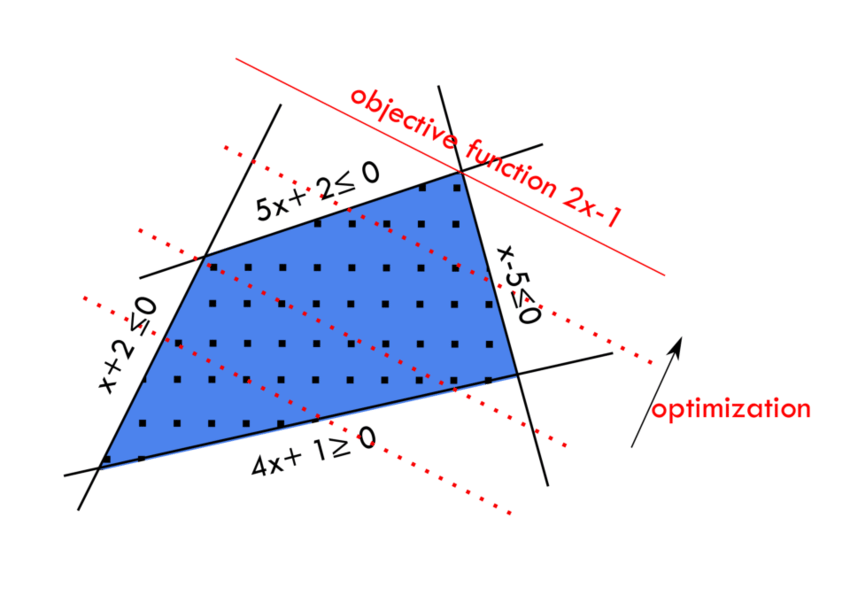

For more information on the PyPSA project go to the [PyPSA website](www.pypsa.org).

This introductory document is intended to introduce students to the PyPSA toolbox. 

The documentation for PyPSA can be found at this [link](https://pypsa.readthedocs.io/en/latest/index.html).


### Overview of PyPSA

PyPSA has a set of components to represent the various elements of the power system. Each component needs to be carefully configured to ensure that it is representative of the system being studied. 

The image below presents some of the main components available in PyPSA.

A summary of each component can be found at this [link](https://pypsa.readthedocs.io/en/latest/components.html). Details of each component is also available on the website. 

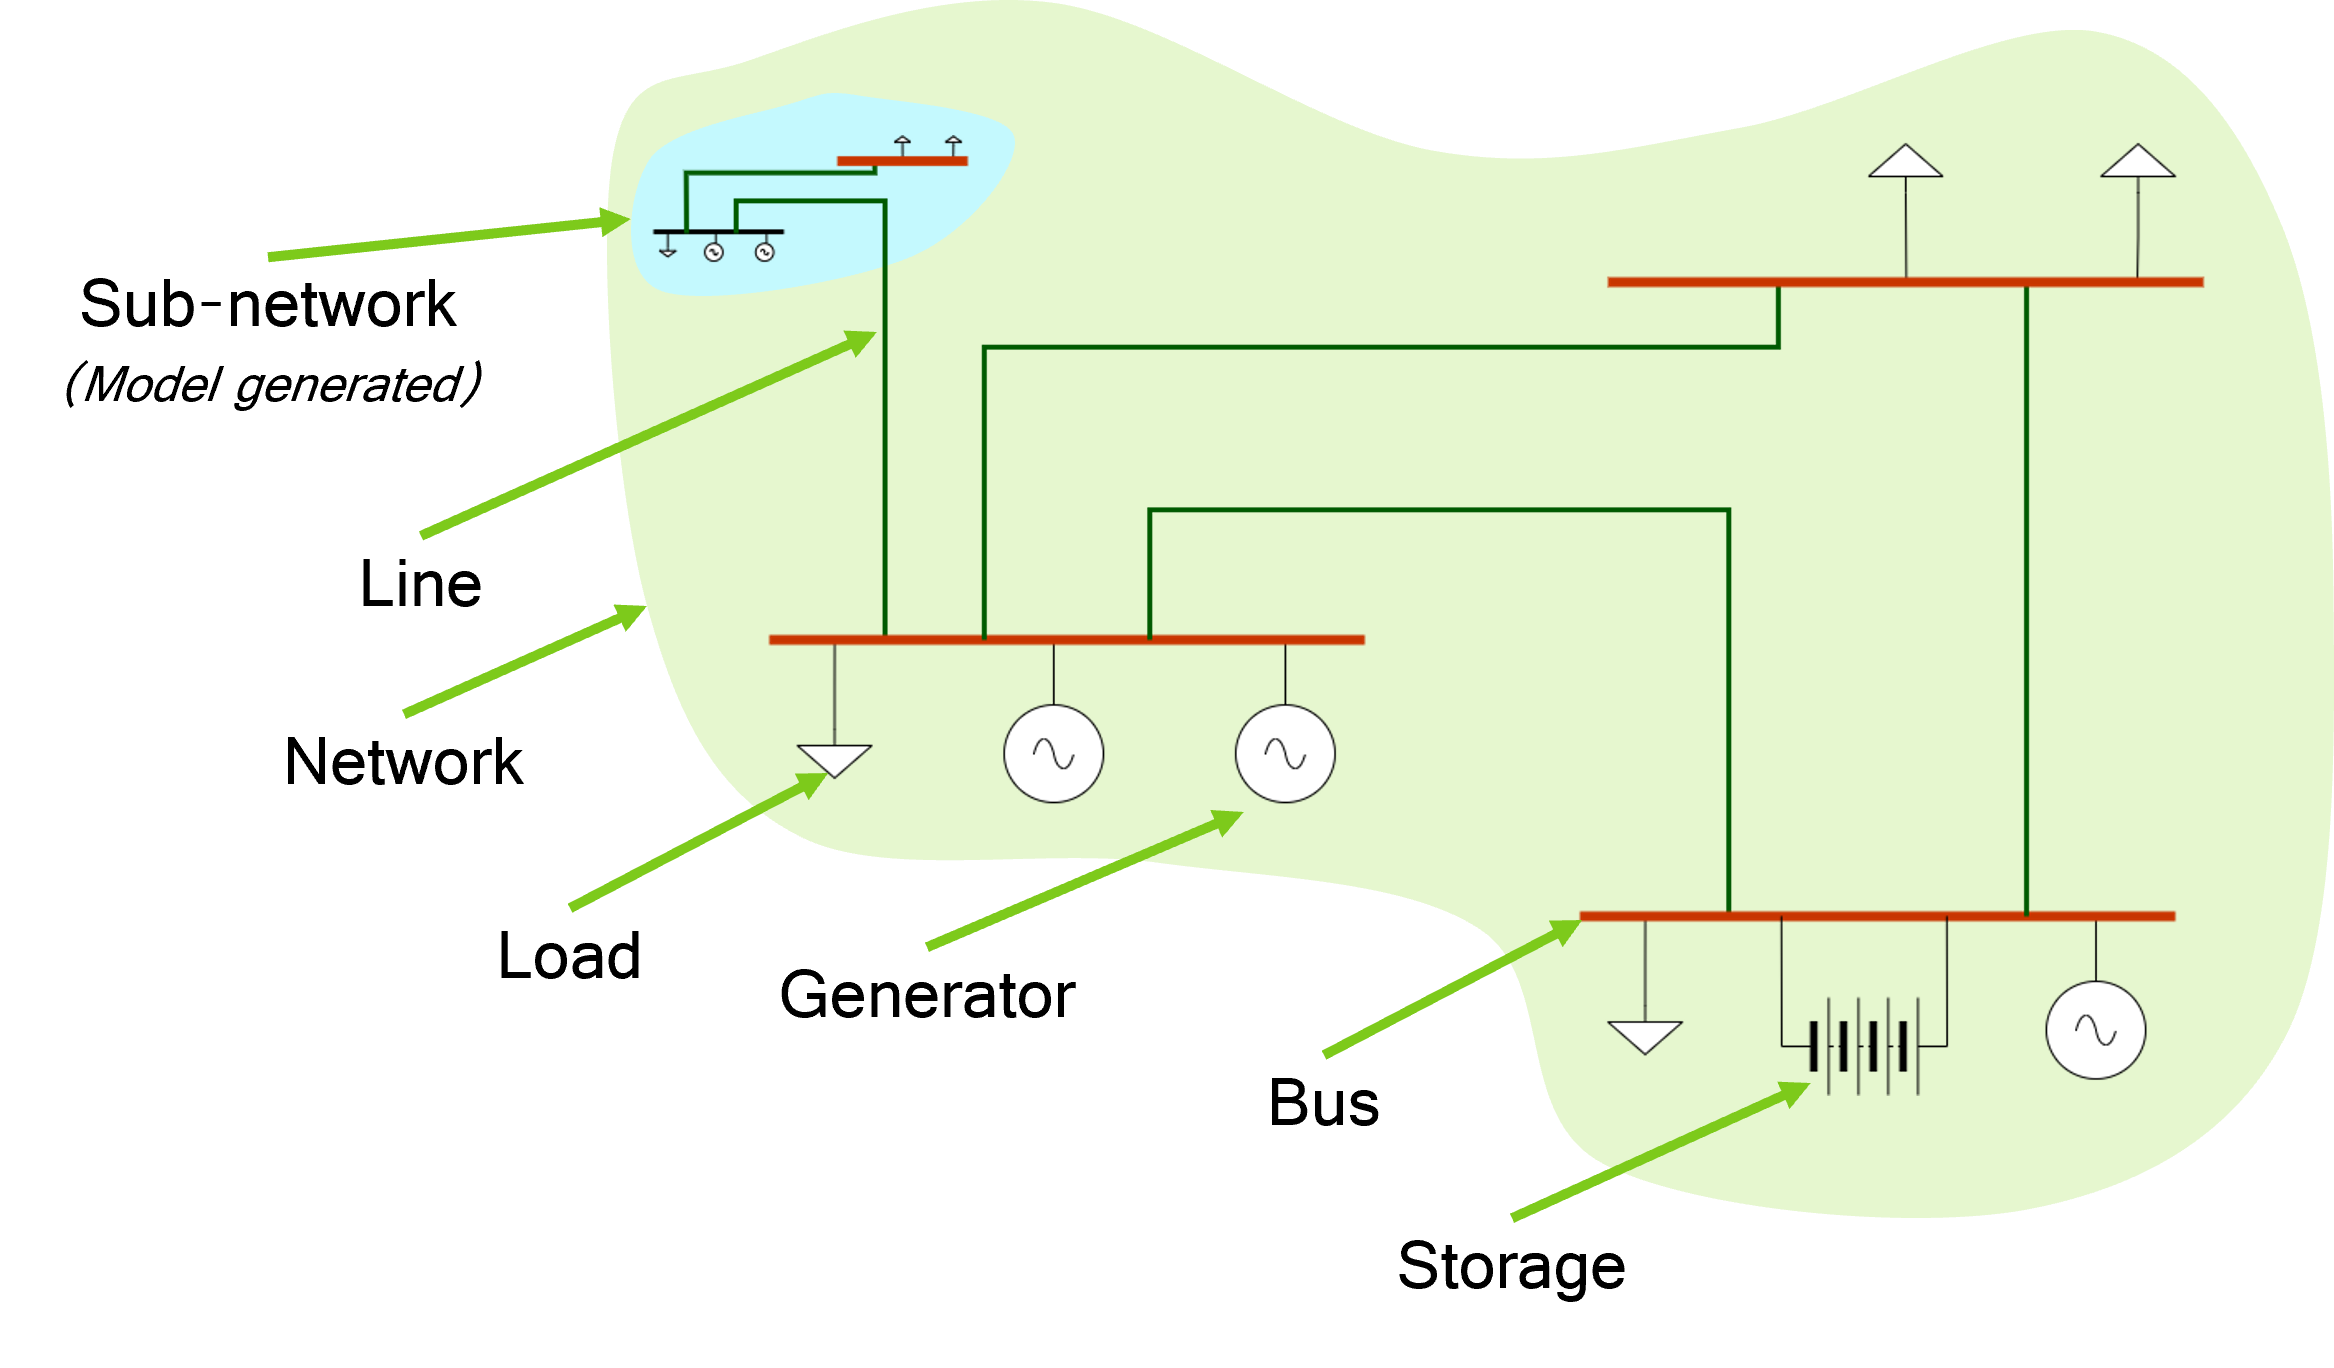

In [ ]:
import os
from google.colab import drive
from google.colab import output


flag_file = "/content/first_run_flag.txt"

if not os.path.exists(flag_file):
    !pip install pypsa==0.19.2
    !pip install -q pyomo==5.7.0
    !apt-get install -y -qq glpk-utils
    !pip install -q cartopy
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/
    with open(flag_file, "w") as f:
        f.write("This is the first run")
    output.clear()
    print("This is the first run during this runtime. Packages installed")
    # Put your code to install packages here
else:
    print("This is not the first run during this runtime.")

## Example 2: Economic dispatch optimisation in PyPSA (I)

In this example we use the same network given in Figure 1. However the marginal costs have been fixed. 

In [ ]:
import pypsa
import numpy as np

#### **Network:**

Create a container for all components and functions which act upon the whole network.

This is typically the boundary of your study. 

Define your container name. 

The name does not need to be `network` however most examples use the word `network`. 

For this example we are going to call our network `rondebosch`. 

In [ ]:
rondebosch = pypsa.Network()

#### **Bus**

Create 3 busses. 

In [ ]:
n_buses = 3

for i in range(n_buses):
    rondebosch.add("Bus","My bus {}".format(i),
                v_nom=20.)
# To display the table you can use, print(), display() or type out the 
# DataFrame name. 
rondebosch.buses

#### **Lines/Links**


In [ ]:
for i in range(n_buses):
    rondebosch.add("Link","My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%n_buses),
                p_nom = 1000,
                p_min_pu=0.01)

rondebosch.links

#### **Generators**
We create three generators, use the same constraints given in Table 1. PyPSA does not allow for marginal costs based on the power produced.

**Table 4: Generator constraints**
\begin{array}{|c|c|} \hline
Generator_i & P_{min,i} & P_{max,i} & cost_{marginal}\\
 & [MW] & [MW]& [R/MWh]\\ \hline
Gen1 & 150 & 600 & 100 \\
Gen2 & 100 & 400 & 200\\
Gen3 & 50 & 200 & 300\\ \hline
\end{array}


In [ ]:
rondebosch.add("Generator", "Gen1", bus="My bus 0", p_nom=600,p_nom_extendable = True,p_nom_max = 600, p_nom_min = 150, p_min_pu = 1 , control="PQ",marginal_cost = 100)
rondebosch.add("Generator", "Gen2", bus="My bus 1", p_nom=400,p_nom_extendable = True,p_nom_max = 400, p_nom_min = 100, p_min_pu = 1, control="PQ",marginal_cost = 200)
rondebosch.add("Generator", "Gen3", bus="My bus 2", p_nom=200,p_nom_extendable = True,p_nom_max = 200, p_nom_min = 50, p_min_pu = 1,control="PQ",marginal_cost = 300)

rondebosch.generators

The value for `p_nom` on Gen1 needs to be 600. 

If you need to change a value in the table you cannot simply re-run the cell above because it will attempt to create new generators. PyPSA will give an error stating that the generator already exists. 

You would need to recreate the network by running the cell `rondebosch = pypsa.Network()` and all subsequent cells. 

Alternatively, you can rename individual values by referenceing the specific cell. 

`<NetworkName>.<Component>.loc[<NetworkName>.<Component>[<col>][<row>]] = <new val>`

In [ ]:
# rondebosch.generators.loc[rondebosch.generators['p_nom']['Gen1']]# =600

# rondebosch.generators

#### **Loads** 





In [ ]:
rondebosch.add("Load", "My load1", bus="My bus 1", p_set=Load1)
rondebosch.add("Load", "My load2", bus="My bus 2", p_set=Load2)

rondebosch.loads

**Perform the optimisation**

In [ ]:
rondebosch.lopf()

**View the results**

In [ ]:
rondebosch.generators_t.p

## Example 3: Economic dispatch optimisation in PyPSA (II)

In this example we replicate the original problem in PyPSA with the marginal costs based on the power output. PyPSA does not allow you to link the marginal cost to the power. Therefore we split each generator into n generators for each load. 

To avoid confusion, we will call this network, rosebank

In [ ]:
import pypsa
import numpy as np

In [ ]:
rosebank = pypsa.Network()

In [ ]:
n_buses = 3

for i in range(n_buses):
    rosebank.add("Bus","My bus {}".format(i),
                v_nom=20.)

# rosebank.buses

In [ ]:
for i in range(n_buses):
    rosebank.add("Link","My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%n_buses),
                p_nom = 1000,
                p_min_pu=0.01)

# rosebank.links

#### **Generators**

We create a function to split each generator and populate the necessary information. 

In [ ]:
def generator_split(name, bus,p_nom_max,p_nom_min, Gen_number, n):
  # The first generator can cover the full range between 0 and minimum load. 
  rosebank.add("Generator", f"{name}:{p_nom_min}", bus=bus, p_nom=p_nom_min,  p_nom_extendable=False,committable = True,
                control="PQ", marginal_cost=cost(p_nom_min, Gen_number, Generators=Gen)[1])
  increment = (p_nom_max - p_nom_min)/n
  # We use a loop to create the remaining generators
  for i in range(n):
      load = p_nom_min + i *increment
      marginal_costs = cost(load+increment, Gen_number, Generators=Gen)[1]
      rosebank.add("Generator", "{}:{:0.5f}".format(name,load), bus=bus, p_nom=increment, p_nom_extendable=True,
                  p_nom_max=increment, p_nom_min=0, p_min_pu=1, control="PQ", marginal_cost=marginal_costs)

In [ ]:
range_1 = 10
range_2 = 20
range_3 = 10

# range_1 = int((Generator_1[4]-Generator_1[3])/5)
# range_2 = int((Generator_2[4]-Generator_2[3])/5)
# range_3 = int((Generator_3[4]-Generator_3[3])/5)

In [ ]:
generator_split("My_Gen1", "My bus 0",Generator_1[4],Generator_1[3], 0, range_1)
generator_split("My_Gen2", "My bus 1",Generator_2[4],Generator_2[3], 1, range_2)
generator_split("My_Gen3", "My bus 2",Generator_3[4],Generator_3[3], 2, range_3)

In [ ]:
rosebank.generators.to_excel('generators.xlsx')

In [ ]:
display(rosebank.generators['marginal_cost'])

In [ ]:
rosebank.add("Load", "My load1", bus="My bus 1", p_set=Load1)
rosebank.add("Load", "My load2", bus="My bus 2", p_set=Load2)

# rosebank.loads

In [ ]:
rosebank.lopf()

In [ ]:
rosebank.generators_t.p

In [ ]:
Rosebank_res = rosebank.generators_t.p.transpose().copy(deep = True)

In [ ]:
Rosebank_res['now']

In [ ]:
Rosebank_res['Check'] = (Rosebank_res['now'] != 0) & (Rosebank_res['now'].shift(-1) == 0)
Rosebank_res['Generator'] = Rosebank_res.index
Rosebank_res['new_column'] = Rosebank_res['Generator'].str.split(':').str[1].astype(float)

In [ ]:
Rosebank_res.loc[Rosebank_res.Check == True]

Discussion: Why did this not work? 


## Example 4: Optimial Power Flow

In the previous examples we perfomed an optimisation for a single time step. In example we extend the problem to optimise the dispatch of three generators over 24 hours. 


In [ ]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyomo

There are several configuration files used for this case. These files have been stored on a shared Google Drive and we will download it to the sheet. 

*   If you mounted your personal Google Drive to this sheet, the downloaded files will appear in your drive in the a folder called *Example4*.
*   If you are using the folders linked to this Google Colab sheet, remember that the files will be deleted when this runtime ends. 

Run the cell below, then open your folder explorer on the left of the screen and find the Example4 folder. 

Download the files onto your computer and inspect each file. If you need to check out what all the variables mean, look at the PyPSA documentation. 

https://pypsa.readthedocs.io/en/latest/


In [ ]:
example4_url = 'https://drive.google.com/drive/folders/1IJ_HIbI1ChHlMX60xzqCuMetV5oX08Vk?usp=share_link'
import gdown
gdown.download_folder(example4_url, quiet=False, use_cookies = False)
output.clear()

In [ ]:
data_folder = "Example4"
network = pypsa.Network()
network.import_from_csv_folder(data_folder)

You can also inspect the code in the notebook. 

In [ ]:
network.buses

In [ ]:
network.generators

In [ ]:
network.lines

In [ ]:
network.loads

In [ ]:
network.snapshots

In [ ]:
network.storage_units

You can plot the maximum power available for each timestep. In this example a solar profile is given to represent the diurnal variation in solar potential. 

In the calculation, this is used as a constraint to fix the power produced from solar. 

In [ ]:
network.generators_t.p_max_pu.plot()

We can also see the demand curve, it looks alot like Table Mountain hey? 

Fun fact: To the indigenous people of the Cape, the Khoisan, Table Mountain was known as Hoerikwaggo, meaning 'mountain in the sea'. 

In [ ]:
network.loads_t.p_set.plot()

In [ ]:
network.snapshots[0]

The code can be solved for each time frame or as a complete network. Try both methods and see how it impacts the solution. 

In [ ]:
#************************
# Method 1
solver_name = 'glpk'
for i in range(24):
    network.lopf(network.snapshots[i],solver_name  = solver_name, pyomo = True)
#************************
# Method 2
# network.lopf(pyomo = True)
#************************

In [ ]:
 p_carrier = network.generators_t.p.groupby(network.generators.carrier,axis = 1).sum()


In [ ]:
p_carrier.plot(kind = 'area')

In [ ]:
network.generators.loc['Hydro','p_nom'] = 100

### Google down 

Google down is a toolbox which allows you to access a shared linked from a Google drive. 

*Activity:*

*Run the script below, then go to inspect the files that appear in the folders for this sheet.*

In [ ]:
# url = 'https://drive.google.com/drive/folders/1NssIVL7Pw-tl0zAyK_fs_xvyeCuipJGi?usp=sharing'
# import gdown
# gdown.download_folder(url, quiet=False, use_cookies = False)
# output.clear()